In [ ]:
import pandas as pd
import numpy as np


Data Preprocessing

Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/THESIS/Global Superstore.csv')

In [ ]:
megaStoreSales_data=df.copy()

Showing first 10 rows values of this dataset

In [ ]:
megaStoreSales_data.head()

Row ID       Order ID Order Date Ship Date       Ship Mode Customer ID  \
0   48883   HU-2011-1220   1/1/2016  1/5/2016    Second Class     AT-7352   
1   42433   AG-2011-2040   1/1/2016  1/6/2016  Standard Class   TB-112801   
2   22255  IN-2011-47883   1/1/2016  1/8/2016  Standard Class   JH-159851   
3   22254  IN-2011-47883   1/1/2016  1/8/2016  Standard Class   JH-159851   
4   22253  IN-2011-47883   1/1/2016  1/8/2016  Standard Class   JH-159851   

     Customer Name   Segment    Country            State  ...  \
0    Annie Thurman  Consumer    Hungary         Budapest  ...   
1  Toby Braunhardt  Consumer    Algeria      Constantine  ...   
2      Joseph Holt  Consumer  Australia  New South Wales  ...   
3      Joseph Holt  Consumer  Australia  New South Wales  ...   
4      Joseph Holt  Consumer  Australia  New South Wales  ...   

                              Product Name         Category Sub-Category  \
0                  Tenex Box, Single Width  Office Supplies      Storage   
1                      Tenex Lockers, Blue  Office Supplies      Storage   
2               Eldon Light Bulb, Duo Pack        Furniture  Furnishings   
3  Eaton Computer Printout Paper, 8.5 x 11  Office Supplies        Paper   
4                 Acme Trimmer, High Speed  Office Supplies     Supplies   

  Quantity Discount Shipping Cost    Sales  Profit  Order Priority  \
0        4      0.0          8.17    66.12   29.64            High   
1        2      0.0         35.46    408.3  106.14          Medium   
2        5      0.1          4.70   113.67   37.77          Medium   
3        2      0.1          1.80   55.242  15.342          Medium   
4        3      0.1          9.72  120.366  36.036          Medium   

   Year (OrderDate)  
0              2016  
1              2016  
2              2016  
3              2016  
4              2016  

[5 rows x 24 columns]

shape the whole dataset

In [ ]:
megaStoreSales_data.shape

(51290, 24)

In [ ]:
megaStoreSales_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'State', 'Market',
       'Region', 'City', 'Product ID', 'Product Name', 'Category',
       'Sub-Category', 'Quantity', 'Discount', 'Shipping Cost', 'Sales',
       'Profit', 'Order Priority', 'Year (OrderDate)'],
      dtype='object')

In [ ]:
megaStoreSales_data=megaStoreSales_data.drop(['Row ID','Order ID','Order Date','Ship Date',
       'Customer ID','State', 'Market','Region','Product ID','Shipping Cost'],axis=1)

In [ ]:
megaStoreSales_data.rename(columns = {'Order Priority':'Inventory Level'}, inplace = True)
megaStoreSales_data.head()

Ship Mode    Customer Name   Segment    Country         City  \
0    Second Class    Annie Thurman  Consumer    Hungary     Budapest   
1  Standard Class  Toby Braunhardt  Consumer    Algeria  Constantine   
2  Standard Class      Joseph Holt  Consumer  Australia  Wagga Wagga   
3  Standard Class      Joseph Holt  Consumer  Australia  Wagga Wagga   
4  Standard Class      Joseph Holt  Consumer  Australia  Wagga Wagga   

                              Product Name         Category Sub-Category  \
0                  Tenex Box, Single Width  Office Supplies      Storage   
1                      Tenex Lockers, Blue  Office Supplies      Storage   
2               Eldon Light Bulb, Duo Pack        Furniture  Furnishings   
3  Eaton Computer Printout Paper, 8.5 x 11  Office Supplies        Paper   
4                 Acme Trimmer, High Speed  Office Supplies     Supplies   

   Quantity  Discount    Sales  Profit Inventory Level  Year (OrderDate)  
0         4       0.0    66.12   29.64            High              2016  
1         2       0.0    408.3  106.14          Medium              2016  
2         5       0.1   113.67   37.77          Medium              2016  
3         2       0.1   55.242  15.342          Medium              2016  
4         3       0.1  120.366  36.036          Medium              2016

Data types of all columns

In [ ]:
#df.dtypes
megaStoreSales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ship Mode         51290 non-null  object 
 1   Customer Name     51290 non-null  object 
 2   Segment           51290 non-null  object 
 3   Country           51290 non-null  object 
 4   City              51290 non-null  object 
 5   Product Name      51290 non-null  object 
 6   Category          51290 non-null  object 
 7   Sub-Category      51290 non-null  object 
 8   Quantity          51290 non-null  int64  
 9   Discount          51290 non-null  float64
 10  Sales             51290 non-null  object 
 11  Profit            51290 non-null  object 
 12  Inventory Level   51290 non-null  object 
 13  Year (OrderDate)  51290 non-null  int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 5.5+ MB


Cleaning Data

Fixing sales and profit column data type from object to float64

In [ ]:
megaStoreSales_data['Sales'] = pd.to_numeric(megaStoreSales_data['Sales'], errors='coerce')
megaStoreSales_data['Profit'] = pd.to_numeric(megaStoreSales_data['Profit'], errors='coerce')


In [ ]:
megaStoreSales_data.dtypes


Ship Mode            object
Customer Name        object
Segment              object
Country              object
City                 object
Product Name         object
Category             object
Sub-Category         object
Quantity              int64
Discount            float64
Sales               float64
Profit              float64
Inventory Level      object
Year (OrderDate)      int64
dtype: object

Checking any null value in all columns

In [ ]:
megaStoreSales_data.isnull().any()

Ship Mode           False
Customer Name       False
Segment             False
Country             False
City                False
Product Name        False
Category            False
Sub-Category        False
Quantity            False
Discount            False
Sales                True
Profit               True
Inventory Level     False
Year (OrderDate)    False
dtype: bool

Handling missing values of sales

In [ ]:
megaStoreSales_data.isnull().sum()

Ship Mode              0
Customer Name          0
Segment                0
Country                0
City                   0
Product Name           0
Category               0
Sub-Category           0
Quantity               0
Discount               0
Sales               2626
Profit               225
Inventory Level        0
Year (OrderDate)       0
dtype: int64

Mean Imputation of Sales

In [ ]:
megaStoreSales_data=megaStoreSales_data.fillna(value=megaStoreSales_data['Sales'].mean())
megaStoreSales_data=megaStoreSales_data.fillna(value=megaStoreSales_data['Profit'].mean())

In [ ]:
megaStoreSales_data.isnull().sum()

Ship Mode           0
Customer Name       0
Segment             0
Country             0
City                0
Product Name        0
Category            0
Sub-Category        0
Quantity            0
Discount            0
Sales               0
Profit              0
Inventory Level     0
Year (OrderDate)    0
dtype: int64

Checking duplicate columns

In [ ]:
megaStoreSales_data[megaStoreSales_data.duplicated()]

Ship Mode    Customer Name      Segment        Country       City  \
1787   Standard Class   Laurel Beltran  Home Office  United States   Columbus   
1958   Standard Class   Andrew Roberts     Consumer      Australia   Armidale   
14893  Standard Class  Roy Französisch     Consumer        Belgium   Mechelen   
17377     First Class    Raymond Messe     Consumer       Thailand    Bangkok   
18758  Standard Class     Luke Schmidt    Corporate          Chile   Rancagua   
21160    Second Class    Pauline Chand  Home Office          Kenya      Thika   
24134        Same Day     Sarah Foster     Consumer      Australia  Newcastle   
24612  Standard Class    Steven Roelle  Home Office          Spain     Madrid   
42788  Standard Class  Cynthia Delaney  Home Office        Algeria       Oran   

                                            Product Name         Category  \
1787   Global Leather Highback Executive Chair with P...        Furniture   
1958              Cardinal Hole Reinforcements, Recycled  Office Supplies   
14893                          Sanford Pens, Fluorescent  Office Supplies   
17377        Office Star Steel Folding Chair, Adjustable        Furniture   
18758              SAFCO Executive Leather Armchair, Red        Furniture   
21160                Cameo Business Envelopes, Set of 50  Office Supplies   
24134               Stanley Pencil Sharpener, Easy-Erase  Office Supplies   
24612                 Wilson Jones 3-Hole Punch, Economy  Office Supplies   
42788                                 Memorex Mouse, USB       Technology   

      Sub-Category  Quantity  Discount    Sales   Profit Inventory Level  \
1787        Chairs         2      0.30  281.372 -12.0588          Medium   
1958       Binders         3      0.10   15.390   2.5200          Medium   
14893          Art         3      0.00   37.080  10.3500          Medium   
17377       Chairs         5      0.27  343.830  89.4300          Medium   
18758       Chairs         2      0.00  615.240  12.2800          Medium   
21160    Envelopes         1      0.00   20.490   8.1900            High   
24134          Art         1      0.10   23.436   9.8760          Medium   
24612      Binders         3      0.00   83.970  27.6300          Medium   
42788  Accessories         2      0.00   56.760  10.7400            High   

       Year (OrderDate)  
1787               2016  
1958               2016  
14893              2017  
17377              2017  
18758              2017  
21160              2018  
24134              2018  
24612              2018  
42788              2019

Checking unique values of columns

In [ ]:
megaStoreSales_data.nunique()

Ship Mode               4
Customer Name         795
Segment                 3
Country               147
City                 3636
Product Name         3788
Category                3
Sub-Category           17
Quantity               14
Discount               27
Sales               20854
Profit              24360
Inventory Level         4
Year (OrderDate)        4
dtype: int64

Showing min,max,count,std,25%,75% and mean values of numeric features

In [ ]:
megaStoreSales_data.describe()

Quantity      Discount         Sales        Profit  \
count  51290.000000  51290.000000  51290.000000  51290.000000   
mean       3.476545      0.142908    161.079341     27.208876   
std        2.278766      0.212280    196.009276    119.956292   
min        1.000000      0.000000      0.444000   -996.780000   
25%        2.000000      0.000000     30.758625      0.000000   
50%        3.000000      0.000000     85.053000      9.301000   
75%        5.000000      0.200000    196.180000     37.162500   
max       14.000000      0.850000    999.980000    999.360000   

       Year (OrderDate)  
count      51290.000000  
mean        2017.777208  
std            1.098931  
min         2016.000000  
25%         2017.000000  
50%         2018.000000  
75%         2019.000000  
max         2019.000000

In [ ]:
Inventory_data=megaStoreSales_data.copy()

EDA

In [ ]:
Eda_df=df.copy()

In [ ]:
Eda_df['Sales'] = pd.to_numeric(Eda_df['Sales'], errors='coerce')
Eda_df['Profit'] = pd.to_numeric(Eda_df['Profit'], errors='coerce')

In [ ]:
Eda_df.isnull().sum()

Row ID                 0
Order ID               0
Order Date             0
Ship Date              0
Ship Mode              0
Customer ID            0
Customer Name          0
Segment                0
Country                0
State                  0
Market                 0
Region                 0
City                   0
Product ID             0
Product Name           0
Category               0
Sub-Category           0
Quantity               0
Discount               0
Shipping Cost          0
Sales               2626
Profit               225
Order Priority         0
Year (OrderDate)       0
dtype: int64

In [ ]:
Eda_df=Eda_df.fillna(value=Eda_df['Sales'].mean())
Eda_df=Eda_df.fillna(value=Eda_df['Profit'].mean())

In [ ]:
Eda_df.isnull().sum()

Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
State               0
Market              0
Region              0
City                0
Product ID          0
Product Name        0
Category            0
Sub-Category        0
Quantity            0
Discount            0
Shipping Cost       0
Sales               0
Profit              0
Order Priority      0
Year (OrderDate)    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 51290 entries, 1/1/2016 to 12/31/2019
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   51290 non-null  float64
 1   Profit  51290 non-null  float64
dtypes: float64(2)
memory usage: 1.2+ MB


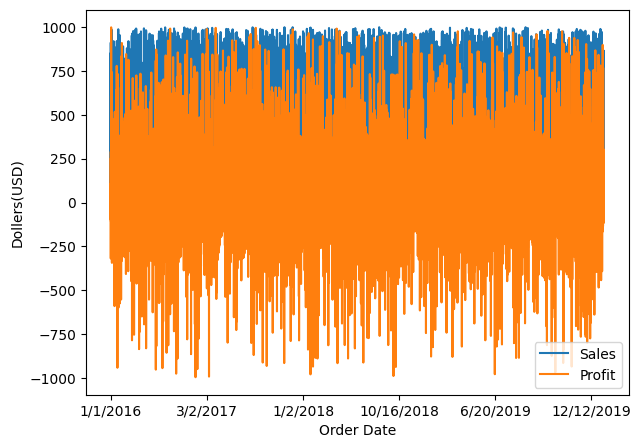

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
megaStoreSales_data_analysis=Eda_df.loc[:,['Order Date','Sales','Profit']]
megaStoreSales_data_analysis.set_index('Order Date',inplace=True)
megaStoreSales_data_analysis.info()
ax=megaStoreSales_data_analysis.plot()
plt.gcf().set_size_inches(7,5)
ax.set_ylabel("Dollers(USD)")
plt.show()

In [ ]:
import seaborn as sns
Eda_df['Segment'].value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

<Axes: xlabel='Segment', ylabel='count'>

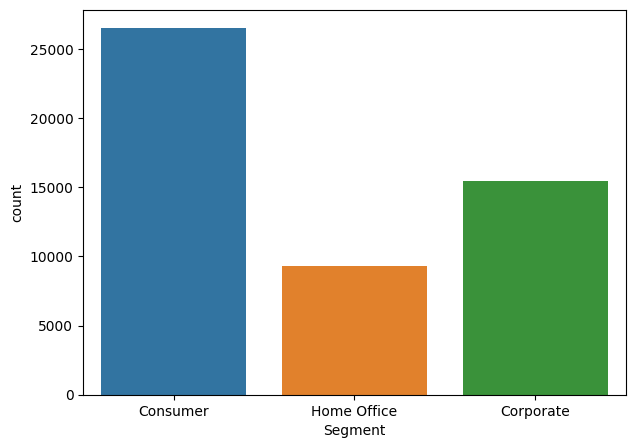

In [ ]:
sns.countplot(x=Eda_df['Segment'])

<Axes: ylabel='Order Priority'>

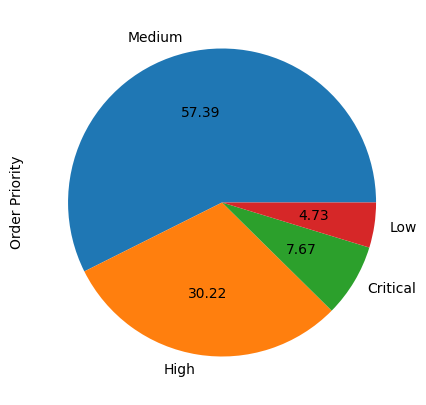

In [ ]:
plt.figure(figsize=(7,5))
Eda_df['Order Priority'].value_counts().plot(kind='pie',autopct='%.2f')

Text(24.0, 0.5, 'Dollers(USD)')

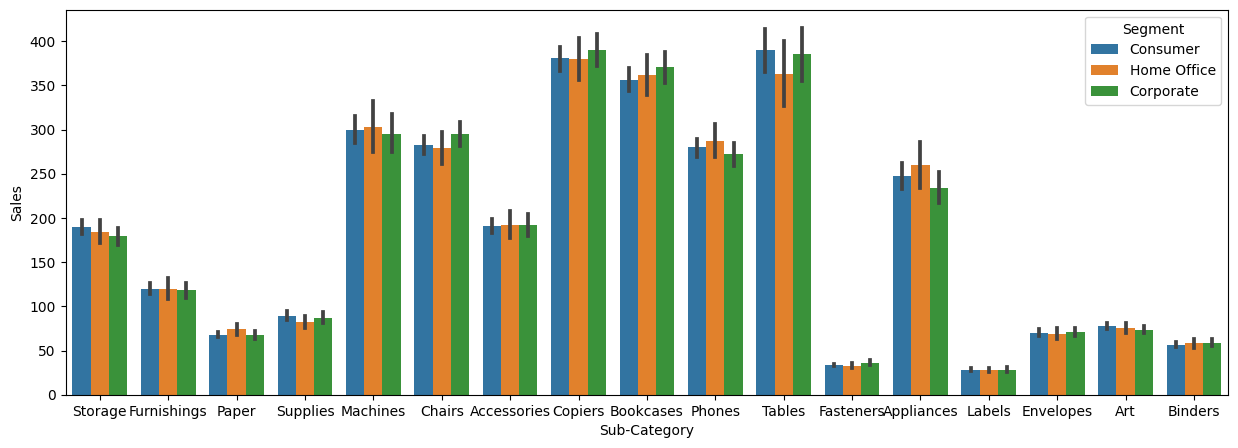

In [ ]:
plt.gcf().set_size_inches(15,5)
sns.barplot(x='Sub-Category',y='Sales',hue=Eda_df['Segment'],data=Eda_df)
ax.set_ylabel("Dollers(USD)")

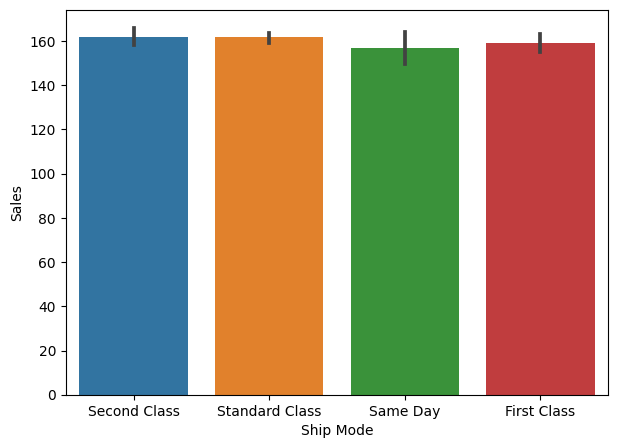

In [ ]:
sns.barplot(x='Ship Mode',y='Sales',data=Eda_df)
plt.gcf().set_size_inches(7,5)

<Axes: xlabel='Category', ylabel='Sales'>

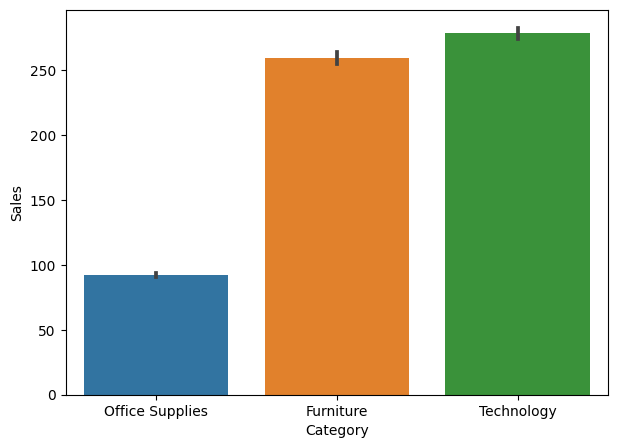

In [ ]:
sns.barplot(x='Category',y='Sales',data=Eda_df)

<Axes: xlabel='Ship Mode', ylabel='Sales'>

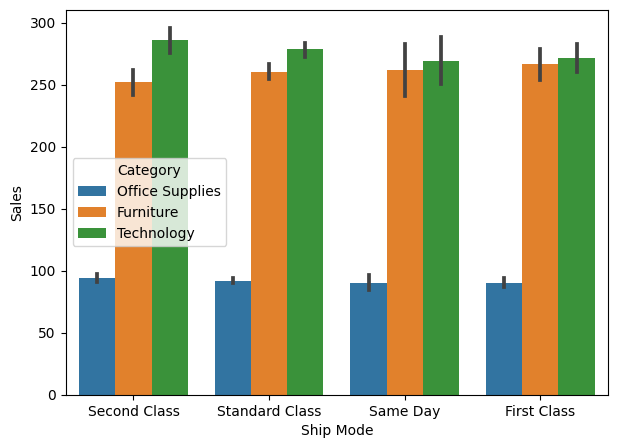

In [ ]:
sns.barplot(x='Ship Mode',y='Sales',hue=Eda_df['Category'],data=Eda_df)

<Axes: xlabel='Order Priority', ylabel='Sales'>

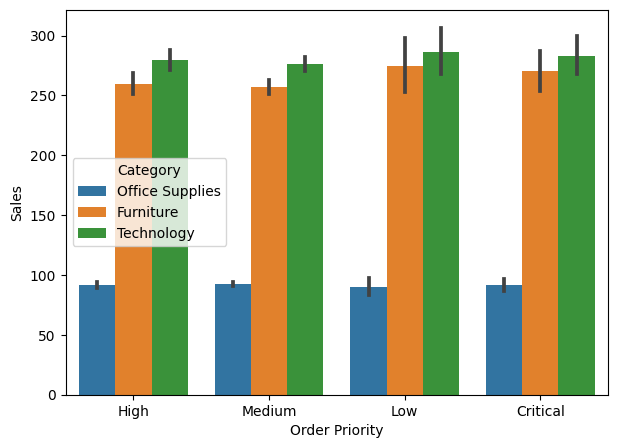

In [ ]:
plt.gcf().set_size_inches(7,5)
sns.barplot(x='Order Priority',y='Sales',hue=df['Category'],data=Eda_df)

<Axes: xlabel='Region', ylabel='Sales'>

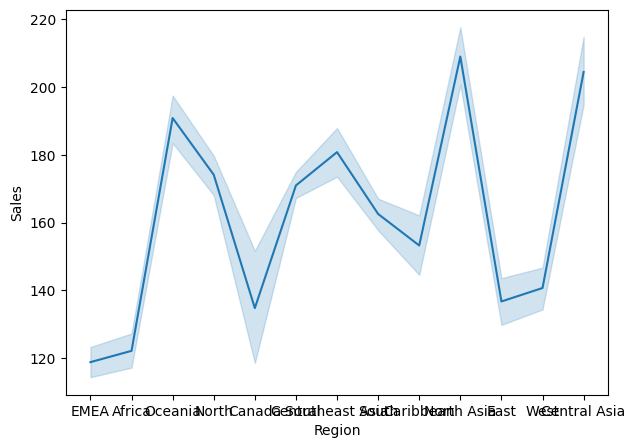

In [ ]:
plt.gcf().set_size_inches(7,5)
sns.lineplot(x='Region', y= 'Sales', data=Eda_df)

<Axes: xlabel='Region', ylabel='Category'>

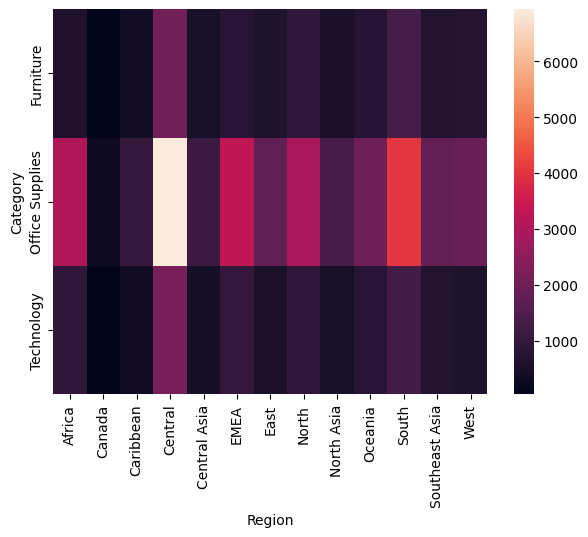

In [ ]:
#color represents the magnitude  of co-relation
sns.heatmap(pd.crosstab(Eda_df['Category'],Eda_df['Region']))

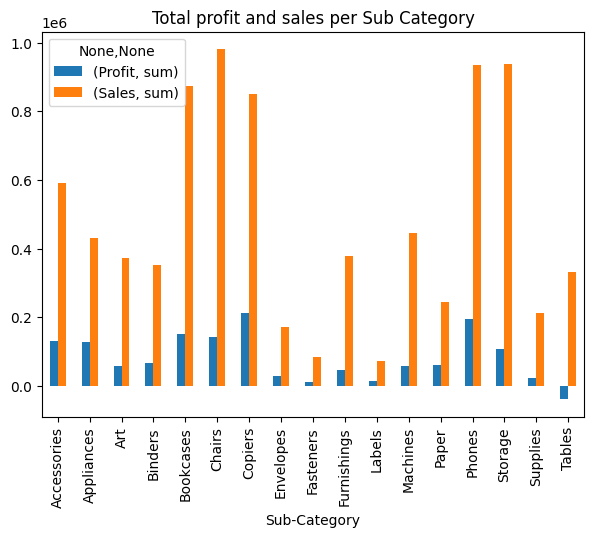

In [ ]:
Eda_df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total profit and sales per Sub Category')
plt.rcParams['figure.figsize'] = [7,5]
plt.show()

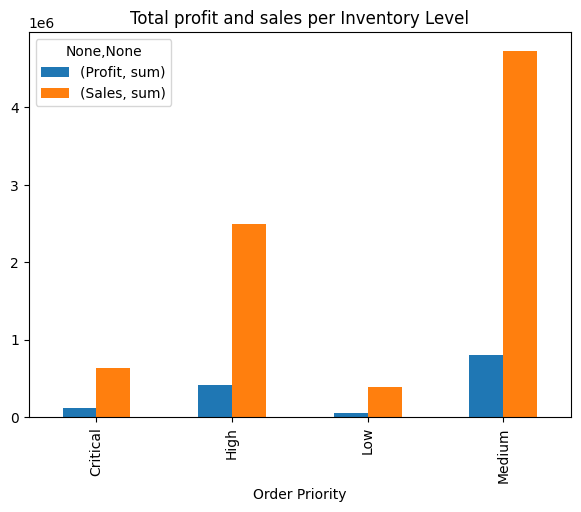

In [ ]:
Eda_df.groupby('Order Priority')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total profit and sales per Inventory Level')
plt.rcParams['figure.figsize'] = [7,5]
plt.show()

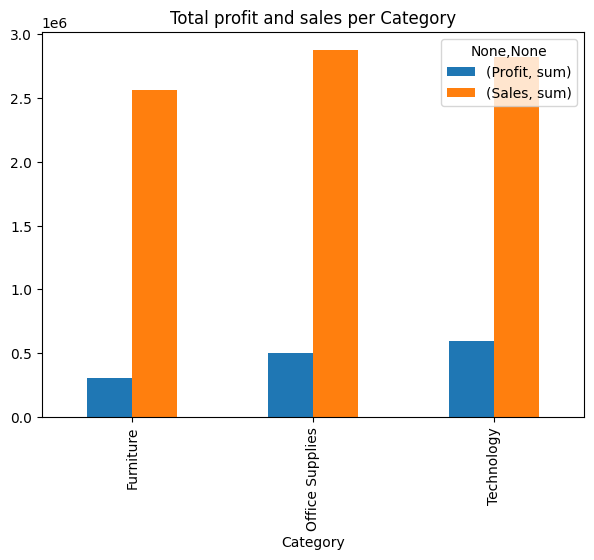

In [ ]:
Eda_df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total profit and sales per Category')
plt.rcParams['figure.figsize'] = [7,5]
plt.show()

In [ ]:
selected_data = Eda_df[(Eda_df['Country'] == 'Bangladesh') & (Eda_df['Region'] == 'Central Asia')]

# Display profit for all states
print(selected_data[['State', 'Profit']])

            State  Profit
437         Dhaka    9.60
438         Dhaka    9.90
439         Dhaka   11.79
440         Dhaka   71.40
888         Dhaka   65.70
...           ...     ...
46358       Dhaka   32.55
46359       Dhaka  265.60
50233  Chittagong    5.40
50885       Dhaka   22.68
50886       Dhaka   39.96

[163 rows x 2 columns]


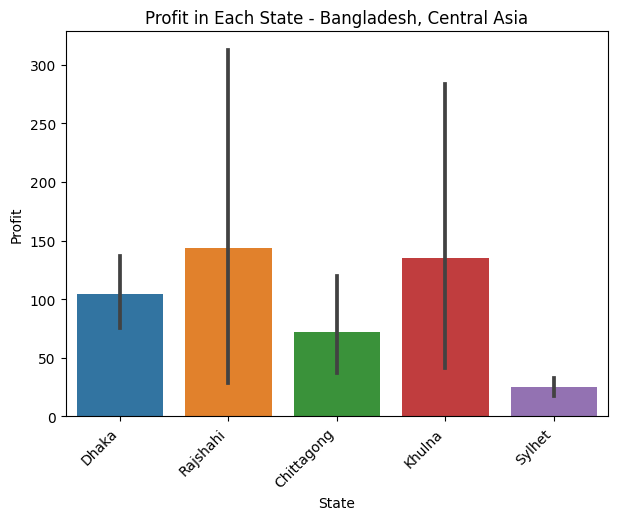

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(x='State', y='Profit', data=selected_data)
plt.title('Profit in Each State - Bangladesh, Central Asia')
plt.xlabel('State')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

            State         Category
437         Dhaka  Office Supplies
438         Dhaka  Office Supplies
439         Dhaka  Office Supplies
440         Dhaka       Technology
888         Dhaka        Furniture
...           ...              ...
46358       Dhaka  Office Supplies
46359       Dhaka  Office Supplies
50233  Chittagong  Office Supplies
50885       Dhaka        Furniture
50886       Dhaka  Office Supplies

[163 rows x 2 columns]


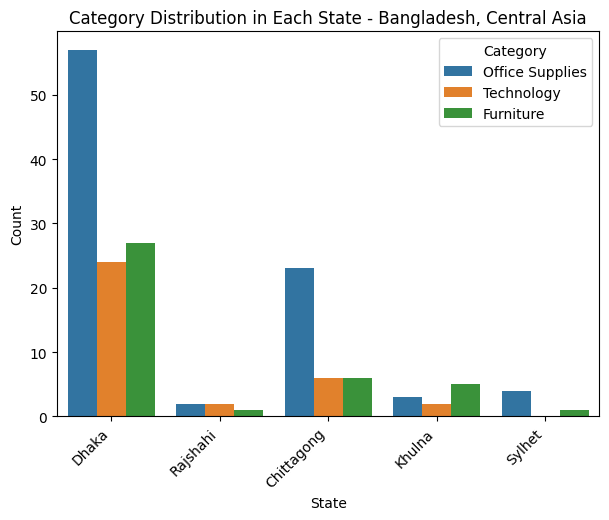

In [ ]:
selected_data = Eda_df[(Eda_df['Country'] == 'Bangladesh') & (Eda_df['Region'] == 'Central Asia')]
print(selected_data[['State', 'Category']])
# Create a countplot for 'Category' in each state
plt.figure(figsize=(7,5))
sns.countplot(x='State', hue='Category', data=selected_data)
plt.title('Category Distribution in Each State - Bangladesh, Central Asia')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.show()

            State Sub-Category
437         Dhaka      Binders
438         Dhaka       Labels
439         Dhaka     Supplies
440         Dhaka      Copiers
888         Dhaka       Chairs
...           ...          ...
46358       Dhaka      Storage
46359       Dhaka      Storage
50233  Chittagong    Fasteners
50885       Dhaka  Furnishings
50886       Dhaka          Art

[163 rows x 2 columns]


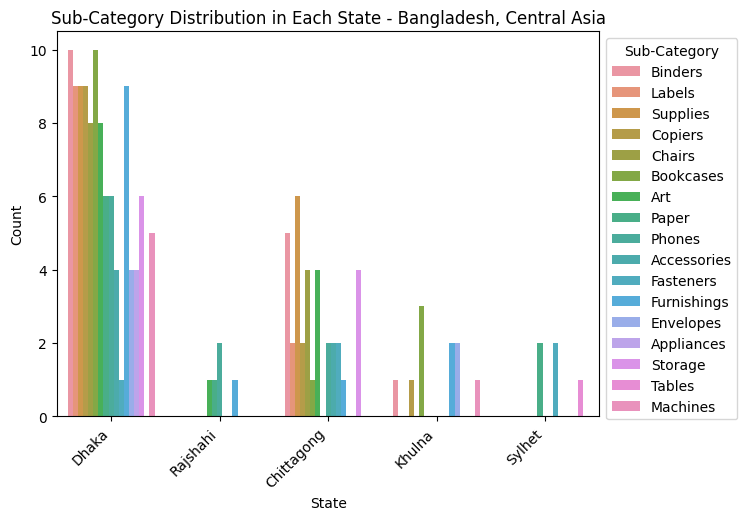

In [ ]:
selected_data = Eda_df[(Eda_df['Country'] == 'Bangladesh') & (Eda_df['Region'] == 'Central Asia')]
print(selected_data[['State', 'Sub-Category']])
# Create a countplot for 'Category' in each state
plt.figure(figsize=(7,5))
sns.countplot(x='State', hue='Sub-Category', data=selected_data)
plt.title('Sub-Category Distribution in Each State - Bangladesh, Central Asia')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Sub-Category', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
selected_data = Eda_df[(Eda_df['Country'] == 'Bangladesh') & (Eda_df['Region'] == 'Central Asia')]

# Display profit for all states
print(selected_data[['State', 'Sales']])

            State       Sales
437         Dhaka   22.650000
438         Dhaka   20.340000
439         Dhaka   40.680000
440         Dhaka  285.780000
888         Dhaka  161.079341
...           ...         ...
46358       Dhaka  112.350000
46359       Dhaka  648.000000
50233  Chittagong   78.120000
50885       Dhaka   75.870000
50886       Dhaka  142.740000

[163 rows x 2 columns]


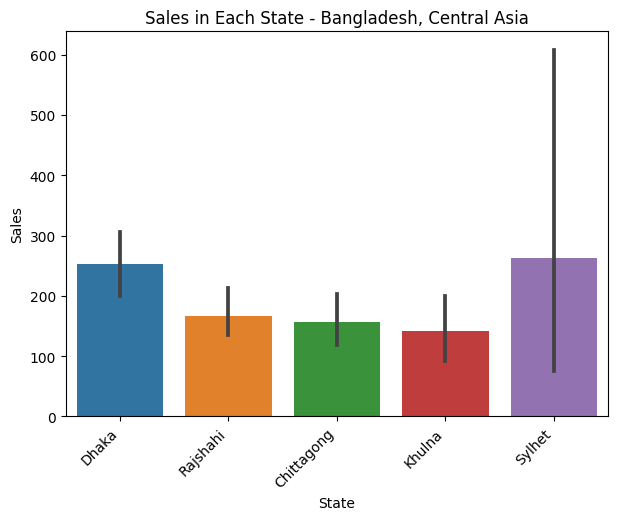

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x='State', y='Sales', data=selected_data)
plt.title('Sales in Each State - Bangladesh, Central Asia')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

Finding the catagorical data

In [ ]:
megaStoreSales_data.dtypes

Ship Mode            object
Customer Name        object
Segment              object
Country              object
City                 object
Product Name         object
Category             object
Sub-Category         object
Quantity              int64
Discount            float64
Sales               float64
Profit              float64
Inventory Level      object
Year (OrderDate)      int64
dtype: object

In [ ]:
megaStoreSales_data_list=list(megaStoreSales_data.columns)
megaStoreSales_data_cat=[]
for i in megaStoreSales_data_list:
    if megaStoreSales_data[i].dtype=='object':
        megaStoreSales_data_cat.append(i)

megaStoreSales_data_cat

['Ship Mode',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'Product Name',
 'Category',
 'Sub-Category',
 'Inventory Level']

Encoding the catagorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencodeer=LabelEncoder()

In [ ]:
megaStoreSales_data['Customer Name'] = labelencodeer.fit_transform(megaStoreSales_data['Customer Name'])
megaStoreSales_data['Product Name'] = labelencodeer.fit_transform(megaStoreSales_data['Product Name'])
megaStoreSales_data['Country'] = labelencodeer.fit_transform(megaStoreSales_data['Inventory Level'])
megaStoreSales_data['City'] = labelencodeer.fit_transform(megaStoreSales_data['City'])
megaStoreSales_data['Sub-Category'] = labelencodeer.fit_transform(megaStoreSales_data['Sub-Category'])
megaStoreSales_data['Inventory Level'] = labelencodeer.fit_transform(megaStoreSales_data['Inventory Level'])

In [ ]:
megaStoreSales_data.head(10)


Ship Mode  Customer Name      Segment  Country  City  Product Name  \
0    Second Class             48     Consumer        1   515          3382   
1  Standard Class            751     Consumer        3   785          3413   
2  Standard Class            398     Consumer        3  3453          1228   
3  Standard Class            398     Consumer        3  3453          1143   
4  Standard Class            398     Consumer        3  3453           168   
5    Second Class            275  Home Office        1  3072          1330   
6  Standard Class            483     Consumer        3  3058          2662   
7  Standard Class            442     Consumer        2  2438          1867   
8  Standard Class            442     Consumer        2  2438          2897   
9  Standard Class            442     Consumer        2  2438           580   

          Category  Sub-Category  Quantity  Discount    Sales   Profit  \
0  Office Supplies            14         4       0.0   66.120   29.640   
1  Office Supplies            14         2       0.0  408.300  106.140   
2        Furniture             9         5       0.1  113.670   37.770   
3  Office Supplies            12         2       0.1   55.242   15.342   
4  Office Supplies            15         3       0.1  120.366   36.036   
5  Office Supplies            12         3       0.5   44.865  -26.055   
6       Technology            11         1       0.0  314.220    3.120   
7        Furniture             5         2       0.4  159.444  -95.676   
8        Furniture             5         2       0.4   68.868  -26.412   
9       Technology             0         2       0.4   69.300    3.420   

   Inventory Level  Year (OrderDate)  
0                1              2016  
1                3              2016  
2                3              2016  
3                3              2016  
4                3              2016  
5                1              2016  
6                3              2016  
7                2              2016  
8                2              2016  
9                2              2016

In [ ]:
megaStoreSales_data.columns

Index(['Ship Mode', 'Customer Name', 'Segment', 'Country', 'City',
       'Product Name', 'Category', 'Sub-Category', 'Quantity', 'Discount',
       'Sales', 'Profit', 'Inventory Level', 'Year (OrderDate)'],
      dtype='object')

OneHotEncoding

In [ ]:
megaStoreSales_data = pd.get_dummies(megaStoreSales_data, columns = ['Segment','Category'])
megaStoreSales_data.head()


Ship Mode  Customer Name  Country  City  Product Name  Sub-Category  \
0    Second Class             48        1   515          3382            14   
1  Standard Class            751        3   785          3413            14   
2  Standard Class            398        3  3453          1228             9   
3  Standard Class            398        3  3453          1143            12   
4  Standard Class            398        3  3453           168            15   

   Quantity  Discount    Sales   Profit  Inventory Level  Year (OrderDate)  \
0         4       0.0   66.120   29.640                1              2016   
1         2       0.0  408.300  106.140                3              2016   
2         5       0.1  113.670   37.770                3              2016   
3         2       0.1   55.242   15.342                3              2016   
4         3       0.1  120.366   36.036                3              2016   

   Segment_Consumer  Segment_Corporate  Segment_Home Office  \
0                 1                  0                    0   
1                 1                  0                    0   
2                 1                  0                    0   
3                 1                  0                    0   
4                 1                  0                    0   

   Category_Furniture  Category_Office Supplies  Category_Technology  
0                   0                         1                    0  
1                   0                         1                    0  
2                   1                         0                    0  
3                   0                         1                    0  
4                   0                         1                    0

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
megaStoreSales_data[['Quantity','Discount','Sales']] = scaler.fit_transform(megaStoreSales_data[['Quantity','Discount','Sales']])



Prediction for Profit

Independent and dependent variable

In [ ]:
X=megaStoreSales_data.drop(['Profit','Customer Name','City','Ship Mode'],axis=1)
Y=megaStoreSales_data['Profit']

In [ ]:
X.columns

Index(['Country', 'Product Name', 'Sub-Category', 'Quantity', 'Discount',
       'Sales', 'Inventory Level', 'Year (OrderDate)', 'Segment_Consumer',
       'Segment_Corporate', 'Segment_Home Office', 'Category_Furniture',
       'Category_Office Supplies', 'Category_Technology'],
      dtype='object')

Splitting train test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=2)

Feature Scaled by Standardization

In [ ]:
X_train

Country  Product Name  Sub-Category  Quantity  Discount     Sales  \
43638        1          1677             1 -0.647964 -0.673210 -0.392329   
51018        3          1765             6 -0.647964  1.069789  0.122391   
38316        1          1588             7  0.668550 -0.673210 -0.673849   
8898         3          2898             5 -0.647964  0.598708 -0.376221   
13508        0          1961             3 -0.647964 -0.673210 -0.667216   
...        ...           ...           ...       ...       ...       ...   
44566        0          1961             3  0.229712 -0.673210 -0.615688   
30280        3          2987            13 -1.086803 -0.673210 -0.124941   
6637         1          2759            13 -0.209126  0.268952 -0.026036   
35343        2          1248            14 -0.647964  1.211113 -0.522426   
23720        3          1486             9 -0.647964  2.153274 -0.793314   

       Inventory Level  Year (OrderDate)  Segment_Consumer  Segment_Corporate  \
43638                1              2019                 1                  0   
51018                3              2019                 1                  0   
38316                1              2019                 1                  0   
8898                 3              2016                 0                  1   
13508                0              2017                 1                  0   
...                ...               ...               ...                ...   
44566                0              2019                 1                  0   
30280                3              2018                 1                  0   
6637                 1              2016                 1                  0   
35343                2              2019                 1                  0   
23720                3              2018                 1                  0   

       Segment_Home Office  Category_Furniture  Category_Office Supplies  \
43638                    0                   0                         1   
51018                    0                   0                         0   
38316                    0                   0                         1   
8898                     0                   1                         0   
13508                    0                   0                         1   
...                    ...                 ...                       ...   
44566                    0                   0                         1   
30280                    0                   0                         0   
6637                     0                   0                         0   
35343                    0                   0                         1   
23720                    0                   1                         0   

       Category_Technology  
43638                    0  
51018                    1  
38316                    0  
8898                     0  
13508                    0  
...                    ...  
44566                    0  
30280                    1  
6637                     1  
35343                    0  
23720                    0  

[41032 rows x 14 columns]

In [ ]:
X_test

Country  Product Name  Sub-Category  Quantity  Discount     Sales  \
17051        3          3282            11 -0.647964 -0.673210  0.847727   
35660        3          2244             0 -0.209126 -0.673210 -0.571404   
17233        3           204             9 -0.647964 -0.673210 -0.705480   
46309        3          3398            14  1.985065  0.127627  3.690518   
43614        1          1231            14 -0.647964  1.211113  0.389846   
...        ...           ...           ...       ...       ...       ...   
26744        3          3468             3 -0.209126  2.624355 -0.799671   
24894        1           115             8  0.229712  1.540869 -0.664755   
27986        1          3197            10  0.229712 -0.673210 -0.599566   
27551        1          1121             3  1.985065  0.268952 -0.073422   
38260        3          2908             5 -0.647964  0.268952 -0.604341   

       Inventory Level  Year (OrderDate)  Segment_Consumer  Segment_Corporate  \
17051                3              2017                 0                  0   
35660                3              2019                 0                  0   
17233                3              2017                 0                  1   
46309                3              2019                 1                  0   
43614                1              2019                 0                  1   
...                ...               ...               ...                ...   
26744                3              2018                 0                  0   
24894                1              2018                 0                  0   
27986                1              2018                 0                  0   
27551                1              2018                 0                  1   
38260                3              2019                 1                  0   

       Segment_Home Office  Category_Furniture  Category_Office Supplies  \
17051                    1                   0                         0   
35660                    1                   0                         0   
17233                    0                   1                         0   
46309                    0                   0                         1   
43614                    0                   0                         1   
...                    ...                 ...                       ...   
26744                    1                   0                         1   
24894                    1                   0                         1   
27986                    1                   0                         1   
27551                    0                   0                         1   
38260                    0                   1                         0   

       Category_Technology  
17051                    1  
35660                    1  
17233                    0  
46309                    0  
43614                    0  
...                    ...  
26744                    0  
24894                    0  
27986                    0  
27551                    0  
38260                    0  

[10258 rows x 14 columns]

In [ ]:
Y_train.isnull().sum()

0

In [ ]:
Y_test

17051     81.7800
35660      4.9080
17233      1.5600
46309    308.9280
43614   -118.7880
           ...   
26744     -3.0366
24894     -8.2176
27986     16.9200
27551     45.8400
38260      4.2624
Name: Profit, Length: 10258, dtype: float64

MODELS

1.Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

print("Training Score:",lr.score(X_train,Y_train)*100)
print("Testing Score:",lr.score(X_test,Y_test)*100)

print("R2_score:",r2_score(Y_test,Y_pred))
print("MAE:",mean_absolute_error(Y_test,Y_pred))
print("MSE:",mean_squared_error(Y_test,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test,Y_pred)))


Training Score: 19.302125029396223
Testing Score: 19.561604000272037
R2_score: 0.19561604000272037
MAE: 57.61224165502192
MSE: 11667.235446840505
RMSE: 108.01497788196092


In [ ]:
megaStoreSales_data_final_lr = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
megaStoreSales_data_final_lr.head()

Actual  Predicted
17051   81.780  78.910471
35660    4.908  81.885126
17233    1.560  42.112132
46309  308.928  71.384249
43614 -118.788 -47.643989

2.Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
Y_pred = dtr.predict(X_test)

print("Training Score:",dtr.score(X_train,Y_train)*100)
print("Testing Score:",dtr.score(X_test,Y_test)*100)


print("R2_score:",r2_score(Y_test,Y_pred))
print("MAE:",mean_absolute_error(Y_test,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test,Y_pred)))

Training Score: 99.87705336451404
Testing Score: 29.39302078969118
R2_score: 0.2939302078969118
MAE: 39.16694297971622
RMSE: 101.19897082167572


In [ ]:
megaStoreSales_data_final_dtr = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
megaStoreSales_data_final_dtr.head()

Actual  Predicted
17051   81.780    88.2600
35660    4.908     9.3000
17233    1.560    10.2480
46309  308.928   277.7175
43614 -118.788  -118.7880

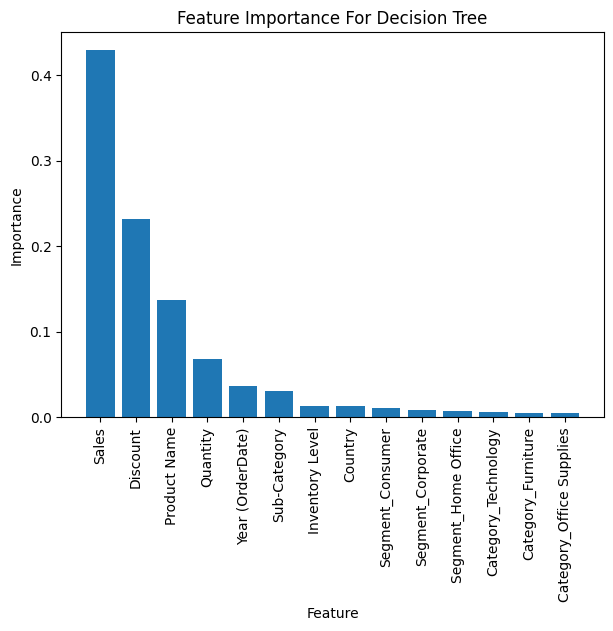

In [ ]:
import matplotlib.pyplot as plt
feature_importances = dtr.feature_importances_
feature_names = list(X_train.columns)
sorted_indices = np.argsort(feature_importances)[::-1]

sorted_feature_names = [feature_names[i] for i in sorted_indices]

plt.figure(figsize=(7, 5))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], tick_label=sorted_feature_names)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance For Decision Tree')
plt.xticks(rotation=90)
plt.show()

3.Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)
Y_pred = rfr.predict(X_test)

print("Training Score:",rfr.score(X_train,Y_train)*100)
print("Testing Score:",rfr.score(X_test,Y_test)*100)


print("R2_score:",r2_score(Y_test,Y_pred))
print("MAE:",mean_absolute_error(Y_test,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test,Y_pred)))

Training Score: 94.51970023556558
Testing Score: 59.41688395055602
R2_score: 0.5941688395055602
MAE: 32.24619082573298
RMSE: 76.72289381557101


In [ ]:
megaStoreSales_data_final_rfr = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
megaStoreSales_data_final_rfr.head()

Actual  Predicted
17051   81.780  59.304130
35660    4.908  16.764043
17233    1.560   6.112602
46309  308.928  56.205353
43614 -118.788 -88.099196

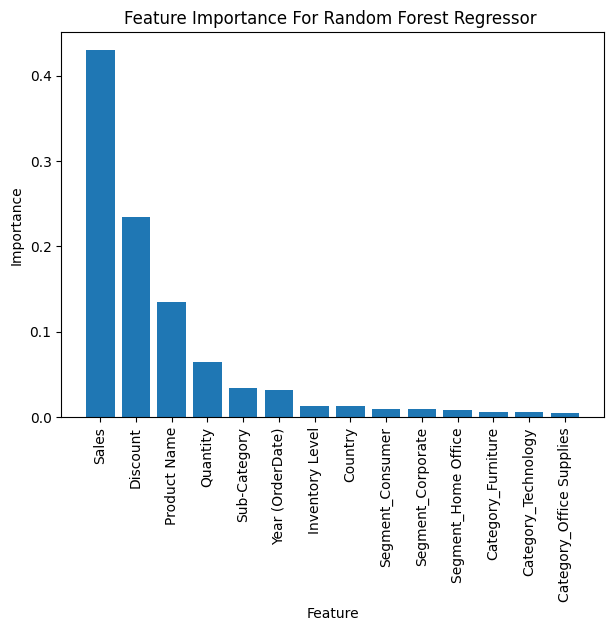

In [ ]:
feature_importances = rfr.feature_importances_
feature_names = list(X_train.columns)
sorted_indices = np.argsort(feature_importances)[::-1]

sorted_feature_names = [feature_names[i] for i in sorted_indices]

plt.figure(figsize=(7,5))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], tick_label=sorted_feature_names)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance For Random Forest Regressor ')
plt.xticks(rotation=90)
plt.show()


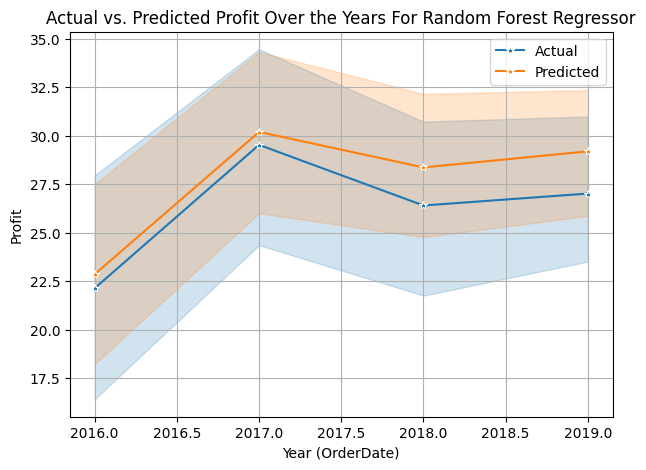

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

actual = megaStoreSales_data_final_rfr['Actual']
predicted = megaStoreSales_data_final_rfr['Predicted']
years = megaStoreSales_data['Year (OrderDate)']

plot_data = pd.DataFrame({'Year (OrderDate)': years, 'Actual': actual, 'Predicted': predicted})

plt.figure(figsize=(7,5))
sns.lineplot(x='Year (OrderDate)', y='Actual', data=plot_data, label='Actual', marker='*')
sns.lineplot(x='Year (OrderDate)', y='Predicted', data=plot_data, label='Predicted', marker='*')
plt.xlabel('Year (OrderDate)')
plt.ylabel('Profit')
plt.title('Actual vs. Predicted Profit Over the Years For Random Forest Regressor')
plt.legend()
plt.grid()
plt.show()

4.Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

gb = GradientBoostingRegressor()
gb.fit(X_train, Y_train)
Y_pred = gb.predict(X_test)

print("Training Score:",gb.score(X_train,Y_train)*100)
print("Testing Score:",gb.score(X_test,Y_test)*100)


print("R2_score:",r2_score(Y_test,Y_pred))
print("MAE:",mean_absolute_error(Y_test,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test,Y_pred)))

Training Score: 60.60703889933464
Testing Score: 59.813700722361475
R2_score: 0.5981370072236147
MAE: 34.61981760491895
RMSE: 76.34687883928912


In [ ]:
megaStoreSales_data_final_gb = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
megaStoreSales_data_final_gb.head()

Actual  Predicted
17051   81.780  72.250636
35660    4.908  17.518869
17233    1.560   7.046257
46309  308.928  69.395010
43614 -118.788 -88.138666

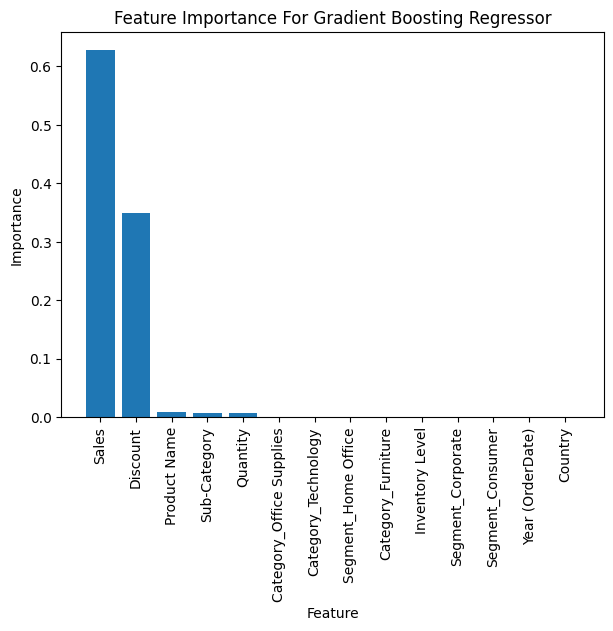

In [ ]:
feature_importances = gb.feature_importances_
feature_names = list(X_train.columns)
sorted_indices = np.argsort(feature_importances)[::-1]

sorted_feature_names = [feature_names[i] for i in sorted_indices]

plt.figure(figsize=(7,5))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], tick_label=sorted_feature_names)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance For Gradient Boosting Regressor')
plt.xticks(rotation=90)
plt.show()

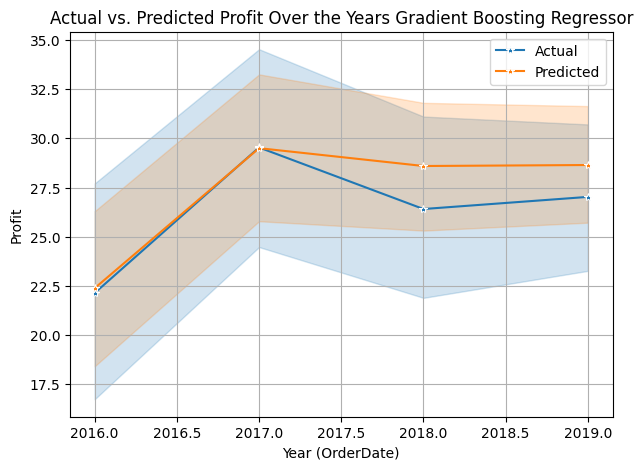

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

actual = megaStoreSales_data_final_gb['Actual']
predicted = megaStoreSales_data_final_gb['Predicted']
years = megaStoreSales_data['Year (OrderDate)']

plot_data = pd.DataFrame({'Year (OrderDate)': years, 'Actual': actual, 'Predicted': predicted})

plt.figure(figsize=(7,5))
sns.lineplot(x='Year (OrderDate)', y='Actual', data=plot_data, label='Actual', marker='*')
sns.lineplot(x='Year (OrderDate)', y='Predicted', data=plot_data, label='Predicted', marker='*')
plt.xlabel('Year (OrderDate)')
plt.ylabel('Profit')
plt.title('Actual vs. Predicted Profit Over the Years Gradient Boosting Regressor')
plt.legend()
plt.grid()
plt.show()

5.XGB Regressor

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

xgb = XGBRegressor(n_estimators=200, learning_rate=0.25)
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)

print("Training Score:",xgb.score(X_train,Y_train)*100)
print("Testing Score:",xgb.score(X_test,Y_test)*100)


print("R2_score:",r2_score(Y_test,Y_pred))
print("MAE:",mean_absolute_error(Y_test,Y_pred))
print("MSE:",mean_squared_error(Y_test,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test,Y_pred)))

Training Score: 80.5926507126726
Testing Score: 55.87054824884403
R2_score: 0.5587054824884403
MAE: 34.83733845387558
MSE: 6400.78282667976
RMSE: 80.00489251714397


In [ ]:
megaStoreSales_data_final_xgb = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
megaStoreSales_data_final_xgb.head()


Actual  Predicted
17051   81.780  56.633831
35660    4.908  18.878572
17233    1.560   6.167048
46309  308.928  55.170879
43614 -118.788 -54.071335

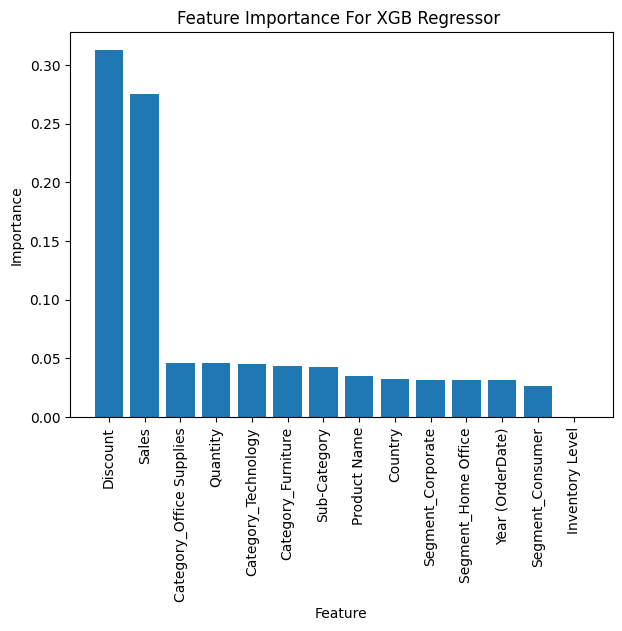

In [ ]:
feature_importances = xgb.feature_importances_
feature_names = list(X_train.columns)
sorted_indices = np.argsort(feature_importances)[::-1]

sorted_feature_names = [feature_names[i] for i in sorted_indices]

plt.figure(figsize=(7,5))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], tick_label=sorted_feature_names)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance For XGB Regressor ')
plt.xticks(rotation=90)
plt.show()

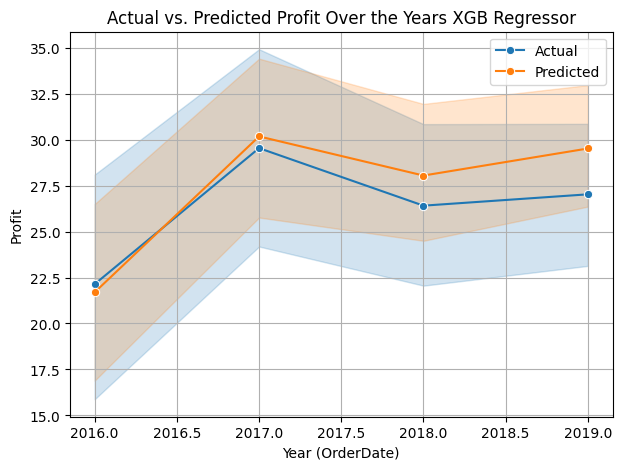

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

actual = megaStoreSales_data_final_xgb['Actual']
predicted = megaStoreSales_data_final_xgb['Predicted']
years = megaStoreSales_data['Year (OrderDate)']

plot_data = pd.DataFrame({'Year (OrderDate)': years, 'Actual': actual, 'Predicted': predicted})

plt.figure(figsize=(7,5))
sns.lineplot(x='Year (OrderDate)', y='Actual', data=plot_data, label='Actual', marker='o')
sns.lineplot(x='Year (OrderDate)', y='Predicted', data=plot_data, label='Predicted', marker='o')
plt.xlabel('Year (OrderDate)')
plt.ylabel('Profit')
plt.title('Actual vs. Predicted Profit Over the Years XGB Regressor')
plt.legend()
plt.grid()
plt.show()

In [ ]:
megaStoreSales_data_final_rfrtune = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
megaStoreSales_data_final_rfrtune.head()

Actual  Predicted
17051   81.780  56.633831
35660    4.908  18.878572
17233    1.560   6.167048
46309  308.928  55.170879
43614 -118.788 -54.071335

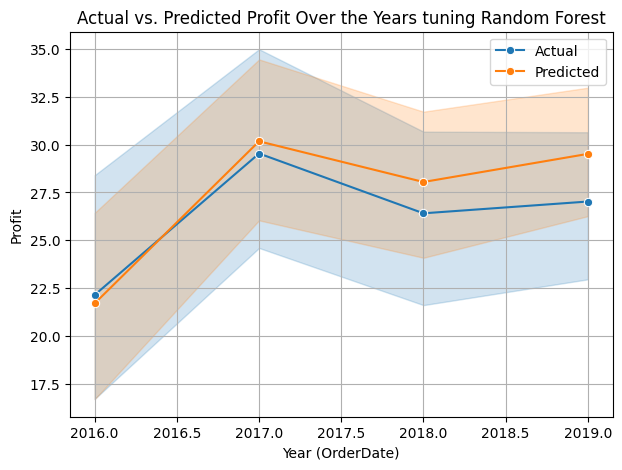

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

actual = megaStoreSales_data_final_rfrtune['Actual']
predicted = megaStoreSales_data_final_rfrtune['Predicted']
years = megaStoreSales_data['Year (OrderDate)']

plot_data = pd.DataFrame({'Year (OrderDate)': years, 'Actual': actual, 'Predicted': predicted})

plt.figure(figsize=(7,5))
sns.lineplot(x='Year (OrderDate)', y='Actual', data=plot_data, label='Actual', marker='o')
sns.lineplot(x='Year (OrderDate)', y='Predicted', data=plot_data, label='Predicted', marker='o')
plt.xlabel('Year (OrderDate)')
plt.ylabel('Profit')
plt.title('Actual vs. Predicted Profit Over the Years tuning Random Forest')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer



param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}


scoring = make_scorer(mean_squared_error, greater_is_better=False)


grid_search = GridSearchCV(rfr, param_grid, cv=5, scoring=scoring)


grid_search.fit(X_train, Y_train)


best_model = grid_search.best_estimator_
best_params = grid_search.best_params_


Y_pred = best_model.predict(X_test)


rmse = mean_squared_error(Y_test, Y_pred, squared=False)
print("Training Score:",best_model.score(X_train,Y_train)*100)
print("Testing Score:",best_model.score(X_test,Y_test)*100)


print("R2_score:",r2_score(Y_test,Y_pred))
print("MAE:",mean_absolute_error(Y_test,Y_pred))
print("MSE:",mean_squared_error(Y_test,Y_pred))

print("Best Hyperparameters:", best_params)
print("RMSE on Test Data:", rmse)


Training Score: 73.73875287440366
Testing Score: 60.38967967593862
R2_score: 0.6038967967593862
MAE: 33.505470938225336
MSE: 5745.302695334187
Best Hyperparameters: {'max_depth': 10, 'n_estimators': 200}
RMSE on Test Data: 75.79777500253016


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
rfr = RandomForestRegressor(max_depth=10, n_estimators=200)
rfr.fit(X_train, Y_train)
Y_pred = rfr.predict(X_test)

print("Training Score:",rfr.score(X_train,Y_train)*100)
print("Testing Score:",rfr.score(X_test,Y_test)*100)


print("R2_score:",r2_score(Y_test,Y_pred))
print("MAE:",mean_absolute_error(Y_test,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test,Y_pred)))

Training Score: 73.75070566227251
Testing Score: 60.368171778968275
R2_score: 0.6036817177896827
MAE: 33.49699535343692
RMSE: 75.81835082065966


In [ ]:
megaStoreSales_data_final_grid = pd.DataFrame({'Actual': Y_test.head(10).values, 'Predicted': Y_pred[:10]})
print(megaStoreSales_data_final_grid)

     Actual   Predicted
0   81.7800   74.790772
1    4.9080   13.344972
2    1.5600    6.035592
3  308.9280   47.692004
4 -118.7880  -63.416080
5  -67.9320  -45.166960
6   75.0000  136.069208
7  -59.5155  -34.167095
8   29.2080   14.419337
9   84.6660   30.103467


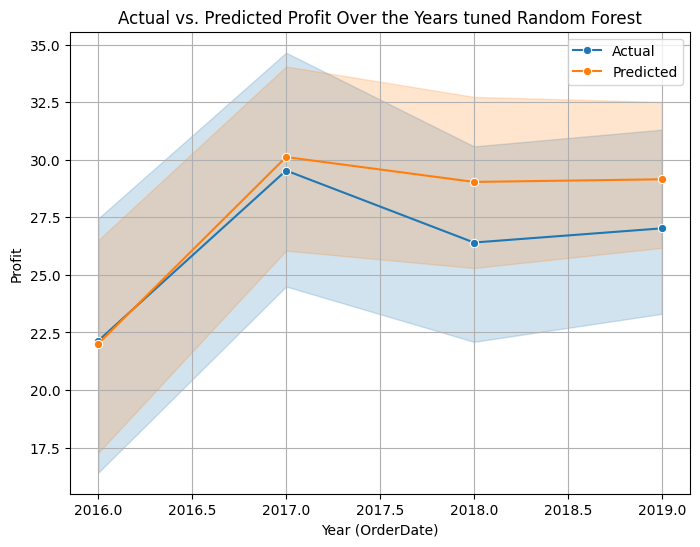

In [ ]:
actual = megaStoreSales_data_final_grid['Actual']
predicted = megaStoreSales_data_final_grid['Predicted']
years = megaStoreSales_data['Year (OrderDate)']

plot_data = pd.DataFrame({'Year (OrderDate)': years, 'Actual': actual, 'Predicted': predicted})

plt.figure(figsize=(8,6))
sns.lineplot(x='Year (OrderDate)', y='Actual', data=plot_data, label='Actual', marker='o')
sns.lineplot(x='Year (OrderDate)', y='Predicted', data=plot_data, label='Predicted', marker='o')
plt.xlabel('Year (OrderDate)')
plt.ylabel('Profit')
plt.title('Actual vs. Predicted Profit Over the Years tuned Random Forest')
plt.legend()
plt.grid()
plt.show()

Prediction for Inventory level

In [ ]:
Inventory_data.columns

Index(['Ship Mode', 'Customer Name', 'Segment', 'Country', 'City',
       'Product Name', 'Category', 'Sub-Category', 'Quantity', 'Discount',
       'Sales', 'Profit', 'Inventory Level', 'Year (OrderDate)'],
      dtype='object')

In [ ]:
megaStoreSales_data_list=list(Inventory_data.columns)
megaStoreSales_data_cat=[]
for i in megaStoreSales_data_list:
    if Inventory_data[i].dtype=='object':
        megaStoreSales_data_cat.append(i)

megaStoreSales_data_cat

['Ship Mode',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'Product Name',
 'Category',
 'Sub-Category',
 'Inventory Level']

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencodeer=LabelEncoder()

Inventory_data['Ship Mode'] = labelencodeer.fit_transform(Inventory_data['Ship Mode'])
Inventory_data['Customer Name'] = labelencodeer.fit_transform(Inventory_data['Customer Name'])
Inventory_data['Segment'] = labelencodeer.fit_transform(Inventory_data['Segment'])
Inventory_data['Country'] = labelencodeer.fit_transform(Inventory_data['Country'])
Inventory_data['City'] = labelencodeer.fit_transform(Inventory_data['City'])
Inventory_data['Product Name'] = labelencodeer.fit_transform(Inventory_data['Product Name'])
Inventory_data['Category'] = labelencodeer.fit_transform(Inventory_data['Category'])
Inventory_data['Sub-Category'] = labelencodeer.fit_transform(Inventory_data['Sub-Category'])
Inventory_data['Inventory Level'] = labelencodeer.fit_transform(Inventory_data['Inventory Level'])

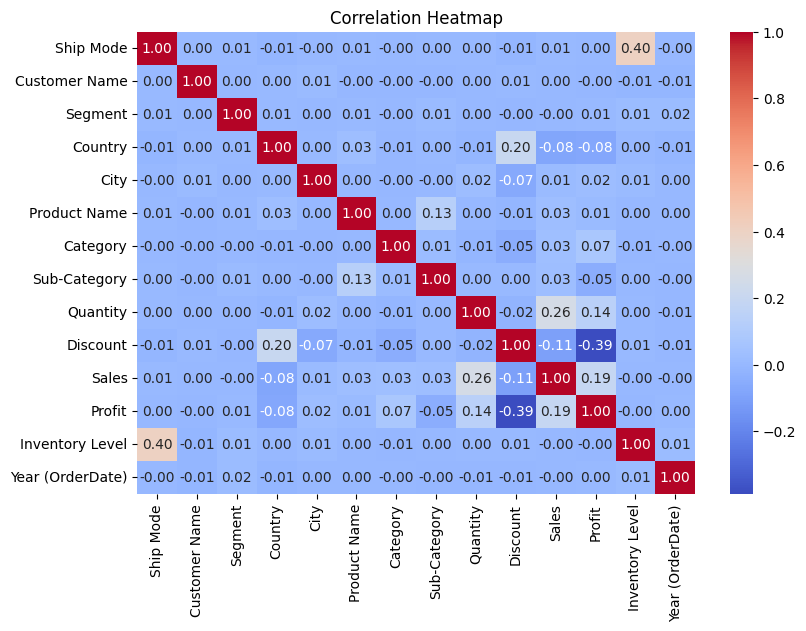

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = Inventory_data.corr()

plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()


Separating dependant and independant variables

In [ ]:
x=Inventory_data.drop(['Customer Name','Product Name','Category','Country','Inventory Level'],axis=1)
y=Inventory_data['Inventory Level']

In [ ]:
x.columns


Index(['Ship Mode', 'Segment', 'City', 'Sub-Category', 'Quantity', 'Discount',
       'Sales', 'Profit', 'Year (OrderDate)'],
      dtype='object')

In [ ]:
x


Ship Mode  Segment  City  Sub-Category  Quantity  Discount       Sales  \
0              2        0   515            14         4     0.000   66.120000   
1              3        0   785            14         2     0.000  408.300000   
2              3        0  3453             9         5     0.100  113.670000   
3              3        0  3453            12         2     0.100   55.242000   
4              3        0  3453            15         3     0.100  120.366000   
...          ...      ...   ...           ...       ...       ...         ...   
51285          2        1  3117             0         1     0.000   74.800000   
51286          2        1  3117             6         5     0.002  161.079341   
51287          3        0    31             3         1     0.000    3.990000   
51288          3        2  2699            10         3     0.000   16.740000   
51289          3        0  3604            10         4     0.000   27.840000   

        Profit  Year (OrderDate)  
0       29.640              2016  
1      106.140              2016  
2       37.770              2016  
3       15.342              2016  
4       36.036              2016  
...        ...               ...  
51285   28.420              2019  
51286  301.466              2019  
51287    0.420              2019  
51288    0.660              2019  
51289    6.120              2019  

[51290 rows x 9 columns]

In [ ]:
y

0        1
1        3
2        3
3        3
4        3
        ..
51285    1
51286    1
51287    3
51288    3
51289    3
Name: Inventory Level, Length: 51290, dtype: int64

 Training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((41032, 9), (10258, 9), (41032,), (10258,))

In [ ]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

41032
10258
41032
10258


Models

1.Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)

print("Training Score:\n",gnb.score(x_train,y_train)*100)
print("Testing Score:\n",gnb.score(x_test,y_test)*100)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Accuracy Score:\n",accuracy_score(y_test,y_pred)*100)

Training Score:
 23.737570676545136
Testing Score:
 24.010528368102943
Classification Report is:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       774
           1       0.46      0.30      0.36      3111
           2       0.08      0.99      0.15       491
           3       0.48      0.18      0.26      5882

    accuracy                           0.24     10258
   macro avg       0.26      0.37      0.19     10258
weighted avg       0.42      0.24      0.27     10258

Confusion Matrix:
 [[   0  471    0  303]
 [   0  919 1362  830]
 [   0    0  485    6]
 [   0  614 4209 1059]]
Accuracy Score:
 24.010528368102943


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2.Decision tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=8, random_state=123,criterion='entropy')
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)

print("Training Score:\n",dtc.score(x_train,y_train)*100)
print("Testing Score:\n",dtc.score(x_test,y_test)*100)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Accuracy Score:\n",accuracy_score(y_test,y_pred)*100)

Training Score:
 61.473971534412165
Testing Score:
 60.157925521544165
Classification Report is:
               precision    recall  f1-score   support

           0       0.32      0.06      0.09       774
           1       0.46      0.29      0.35      3111
           2       0.18      0.00      0.01       491
           3       0.64      0.89      0.74      5882

    accuracy                           0.60     10258
   macro avg       0.40      0.31      0.30     10258
weighted avg       0.54      0.60      0.54     10258

Confusion Matrix:
 [[  43  438    0  293]
 [  59  896    4 2152]
 [   0    1    2  488]
 [  32  615    5 5230]]
Accuracy Score:
 60.157925521544165


In [ ]:
megaStoreSales_data_final_dtc = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
megaStoreSales_data_final_dtc.head(10).T

25999  28301  25672  16308  17224  20476  11528  7690   21445  \
Actual         3      3      3      3      3      1      3      1      1   
Predicted      1      3      3      3      3      3      3      3      3   

           30492  
Actual         0  
Predicted      1

3.Random forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

print("Training Score:\n",rf.score(x_train,y_train)*100)
print("Testing Score:\n",rf.score(x_test,y_test)*100)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Accuracy Score:\n",accuracy_score(y_test,y_pred)*100)


Training Score:
 99.99268863326184
Testing Score:
 60.850068239422896
Classification Report is:
               precision    recall  f1-score   support

           0       0.41      0.14      0.21       774
           1       0.48      0.35      0.41      3111
           2       0.45      0.01      0.02       491
           3       0.65      0.85      0.74      5882

    accuracy                           0.61     10258
   macro avg       0.50      0.34      0.34     10258
weighted avg       0.57      0.61      0.57     10258

Confusion Matrix:
 [[ 109  411    0  254]
 [  85 1102    0 1924]
 [   0   12    5  474]
 [  70  780    6 5026]]
Accuracy Score:
 60.850068239422896


In [ ]:
megaStoreSales_data_final_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
megaStoreSales_data_final_rf.head(10).T

25999  28301  25672  16308  17224  20476  11528  7690   21445  \
Actual         3      3      3      3      3      1      3      1      1   
Predicted      1      3      3      3      1      3      3      3      3   

           30492  
Actual         0  
Predicted      1

4.Gradient Boosting Classifier

In [ ]:
import xgboost as xgb
gbc=xgb.XGBClassifier()
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)

print("Training Score:\n",gbc.score(x_train,y_train)*100)
print("Testing Score:\n",gbc.score(x_test,y_test)*100)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Accuracy Score:\n",accuracy_score(y_test,y_pred)*100)



Training Score:
 71.03236498342757
Testing Score:
 60.908559173328136
Classification Report is:
               precision    recall  f1-score   support

           0       0.40      0.11      0.17       774
           1       0.48      0.34      0.40      3111
           2       0.09      0.00      0.00       491
           3       0.65      0.87      0.74      5882

    accuracy                           0.61     10258
   macro avg       0.41      0.33      0.33     10258
weighted avg       0.55      0.61      0.56     10258

Confusion Matrix:
 [[  86  419    0  269]
 [  74 1056    3 1978]
 [   0    2    1  488]
 [  57  713    7 5105]]
Accuracy Score:
 60.908559173328136


In [ ]:
megaStoreSales_data_final_gb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
megaStoreSales_data_final_gb.head(10).T

25999  28301  25672  16308  17224  20476  11528  7690   21445  \
Actual         3      3      3      3      3      1      3      1      1   
Predicted      1      3      3      3      1      3      3      3      3   

           30492  
Actual         0  
Predicted      1

5.KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

k = 5
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print("Training Score:\n",clf.score(x_train,y_train)*100)
print("Testing Score:\n",clf.score(x_test,y_test)*100)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Accuracy Score:\n",accuracy_score(y_test,y_pred)*100)


Training Score:
 65.08578670306102
Testing Score:
 48.39149931760577
Classification Report is:
               precision    recall  f1-score   support

           0       0.09      0.05      0.06       774
           1       0.33      0.31      0.32      3111
           2       0.08      0.02      0.04       491
           3       0.58      0.67      0.63      5882

    accuracy                           0.48     10258
   macro avg       0.27      0.26      0.26     10258
weighted avg       0.44      0.48      0.46     10258

Confusion Matrix:
 [[  36  206    6  526]
 [ 128  952   43 1988]
 [  16  145   12  318]
 [ 216 1613   89 3964]]
Accuracy Score:
 48.39149931760577


In [ ]:
megaStoreSales_data_final_clf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
megaStoreSales_data_final_clf.head(10).T

25999  28301  25672  16308  17224  20476  11528  7690   21445  \
Actual         3      3      3      3      3      1      3      1      1   
Predicted      3      1      1      1      3      3      1      3      3   

           30492  
Actual         0  
Predicted      3

**Time series Analysis with ARIMA and XGboost**

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams as rc
rc['figure.figsize']=7,5

just time series data

In [ ]:
timeseries_data = df[['Order Date','Category','Profit']].copy()
timeseries_data.head()

Order Date         Category  Profit
0   1/1/2016  Office Supplies   29.64
1   1/1/2016  Office Supplies  106.14
2   1/1/2016        Furniture   37.77
3   1/1/2016  Office Supplies  15.342
4   1/1/2016  Office Supplies  36.036

In [ ]:
timeseries_data=timeseries_data.drop(columns=['Category'],axis=1)

In [ ]:
timeseries_data['Order Date'] = pd.to_datetime(timeseries_data['Order Date'])
timeseries_data.set_index('Order Date', inplace=True)

In [ ]:
timeseries_data['Profit'] = pd.to_numeric(timeseries_data['Profit'], errors='coerce')

In [ ]:
timeseries_data = timeseries_data['Profit'].resample('MS').mean()
timeseries_data.head()

Order Date
2016-01-01    25.078397
2016-02-01    20.240604
2016-03-01    24.110839
2016-04-01    20.874111
2016-05-01    19.305029
Freq: MS, Name: Profit, dtype: float64

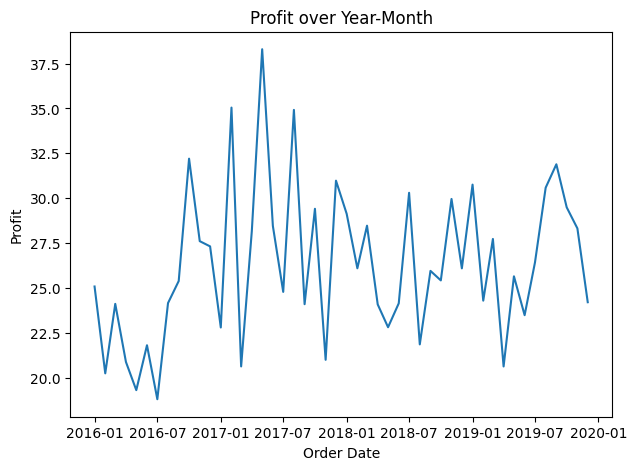

In [ ]:
plt.xlabel("Order Date")
plt.ylabel("Profit")
plt.title('Profit over Year-Month')
plt.plot(timeseries_data)

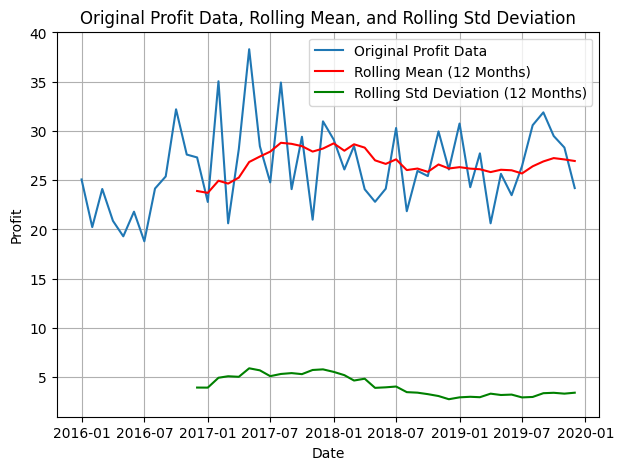

In [ ]:
window_size = 12
rolling_mean = timeseries_data.rolling(window=window_size).mean()
rolling_std = timeseries_data.rolling(window=window_size).std()

# Plot the original time series data, rolling mean, and rolling standard deviation
plt.figure(figsize=(7, 5))
plt.plot(timeseries_data, label='Original Profit Data')
plt.plot(rolling_mean, label=f'Rolling Mean ({window_size} Months)', color='red')
plt.plot(rolling_std, label=f'Rolling Std Deviation ({window_size} Months)', color='green')
plt.title('Original Profit Data, Rolling Mean, and Rolling Std Deviation')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
result = adfuller(timeseries_data, autolag='AIC')

adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Check stationarity based on the p-value
if p_value <= 0.05:
    print('The time series is stationary (reject the null hypothesis).')
else:
    print('The time series is not stationary (fail to reject the null hypothesis).')


ADF Statistic: -6.319227618839027
p-value: 3.095608665513301e-08
Critical Values:
   1%: -3.5778480370438146
   5%: -2.925338105429433
   10%: -2.6007735310095064
The time series is stationary (reject the null hypothesis).


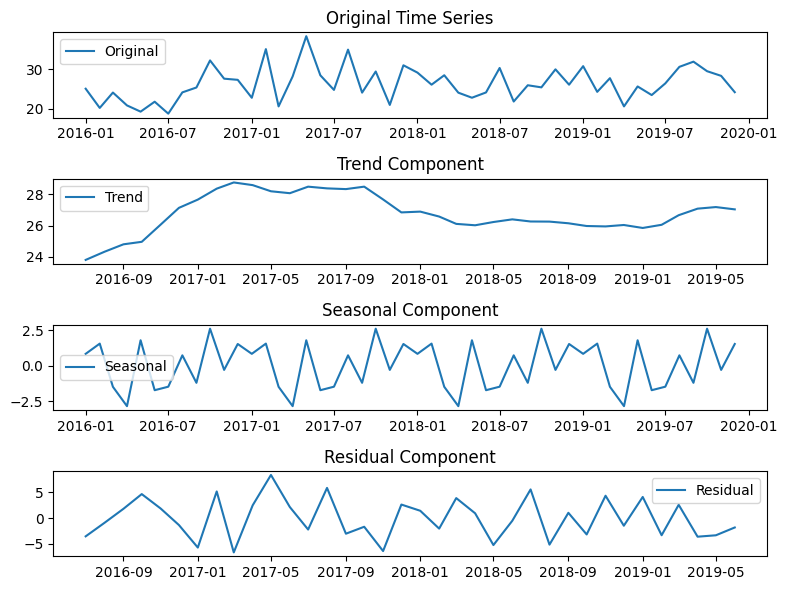

In [ ]:
decomposition = seasonal_decompose(timeseries_data, model='additive')

# Plot the original time series
plt.figure(figsize=(8, 6))
plt.subplot(411)
plt.plot(timeseries_data, label='Original')
plt.legend(loc='best')
plt.title('Original Time Series')

# Plot the trend component
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend Component')

# Plot the seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.title('Seasonal Component')

# Plot the residual component
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


In [ ]:
train=timeseries_data[:round(len(timeseries_data)*75/100)]
test=timeseries_data[round(len(timeseries_data)*75/100):]
len(train),len(test)

(36, 12)

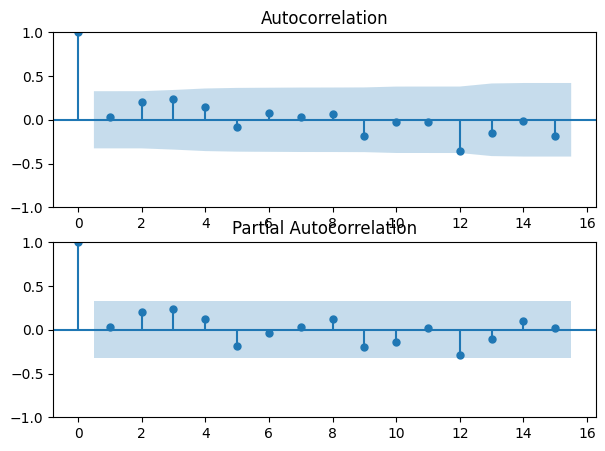

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5))
plot_acf(train, lags=15, ax=ax1)
plot_pacf(train, lags=15, ax=ax2)

plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(train, order=(1, 1, 1))#p=q=2,d=1
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Profit   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -102.660
Date:                Wed, 15 Nov 2023   AIC                            211.319
Time:                        16:20:29   BIC                            215.985
Sample:                    01-01-2016   HQIC                           212.930
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2827      0.228     -1.242      0.214      -0.729       0.163
ma.L1         -0.6753      0.179     -3.769      0.000      -1.026      -0.324
sigma2        20.0578      4.522      4.435      0.0

In [ ]:
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2019-12-01')

predictions = model_fit.predict(start=start_date, end=end_date)

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_elements = y_true != 0
    return np.mean(np.abs((y_true[nonzero_elements] - y_pred[nonzero_elements]) / y_true[nonzero_elements]))

def mean_absolute_percentage_accuracy(y_true, y_pred):
    return 100 - mean_absolute_percentage_error(y_true, y_pred)*100

mape = mean_absolute_percentage_error(test, predictions)
mapa = mean_absolute_percentage_accuracy(test, predictions)

print(f'RMSE: {rmse}',f'MSE: {mse}')
print(f'MAPE: {mape:.4f}')
print(f'MAPA: {mapa:.2f}%')

RMSE: 3.2767800048348232 MSE: 10.737287200085303
MAPE: 0.1072
MAPA: 89.28%


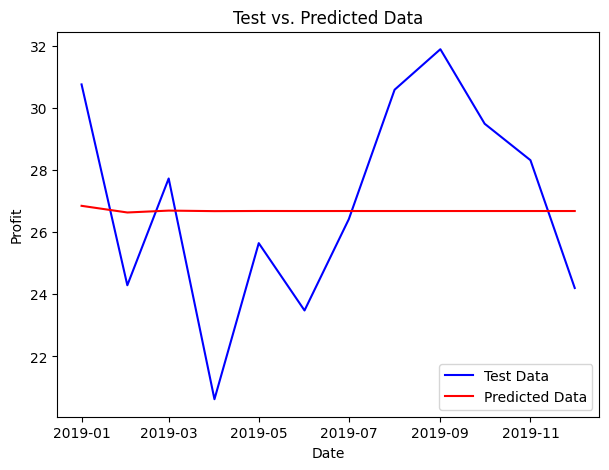

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(test, label='Test Data', color='blue')
plt.plot(predictions, label='Predicted Data', color='red')
plt.legend()
plt.title('Test vs. Predicted Data')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()

In [ ]:
import warnings
warnings.simplefilter("ignore")
import itertools
import statsmodels.api as sm

p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 4)

pdq_combinations = list(itertools.product(p_values, d_values, q_values))
aic_results = []

for pdq in pdq_combinations:
    try:
        model = sm.tsa.ARIMA(train, order=pdq)
        results = model.fit()
        aic_results.append((pdq, results.aic))
        print(f"PDQ: {pdq}, AIC: {results.aic}")
    except:
        continue

best_pdq = min(aic_results, key=lambda x: x[1])[0]

print(f"Best PDQ combination: {best_pdq}")


PDQ: (0, 0, 0), AIC: 214.90152839622309
PDQ: (0, 0, 1), AIC: 216.88206974181384
PDQ: (0, 0, 2), AIC: 217.4141756553963
PDQ: (0, 0, 3), AIC: 216.0676297112529
PDQ: (0, 1, 0), AIC: 231.27571455528894
PDQ: (0, 1, 1), AIC: 211.1214948041979
PDQ: (0, 1, 2), AIC: 211.16392044788387
PDQ: (0, 1, 3), AIC: 213.0939223586201
PDQ: (1, 0, 0), AIC: 216.87434553962882
PDQ: (1, 0, 1), AIC: 217.4698170054046
PDQ: (1, 0, 2), AIC: 216.8528187319487
PDQ: (1, 0, 3), AIC: 217.958148951847
PDQ: (1, 1, 0), AIC: 217.7920827115437
PDQ: (1, 1, 1), AIC: 211.31931162301962
PDQ: (1, 1, 2), AIC: 213.13244286088752
PDQ: (1, 1, 3), AIC: 214.55352049300487
PDQ: (2, 0, 0), AIC: 217.26108593152614
PDQ: (2, 0, 1), AIC: 217.6460809092761
PDQ: (2, 0, 2), AIC: 216.7937258126529
PDQ: (2, 0, 3), AIC: 218.73816141079493
PDQ: (2, 1, 0), AIC: 212.98511538512685
PDQ: (2, 1, 1), AIC: 212.94955854683303
PDQ: (2, 1, 2), AIC: 214.94561243024404
PDQ: (2, 1, 3), AIC: 214.87544978384844
PDQ: (3, 0, 0), AIC: 217.12825061734463
PDQ: (3, 0,

In [ ]:
from sklearn.metrics import mean_squared_error
model = ARIMA(train, order=(0, 1, 1))
model_fit = model.fit()
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2019-12-01')

predictions = model_fit.predict(start=start_date, end=end_date)

mse=mean_squared_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_elements = y_true != 0
    return np.mean(np.abs((y_true[nonzero_elements] - y_pred[nonzero_elements]) / y_true[nonzero_elements]))

def mean_absolute_percentage_accuracy(y_true, y_pred):
    return 100 - mean_absolute_percentage_error(y_true, y_pred)*100

mape = mean_absolute_percentage_error(test, predictions)
mapa = mean_absolute_percentage_accuracy(test, predictions)

print(f'RMSE: {rmse}',f'MSE: {mse}')
print(f'MAPE: {mape:.4f}')
print(f'MAPA: {mapa:.2f}%')

RMSE: 3.322710704703588 MSE: 11.040406427151817
MAPE: 0.1070
MAPA: 89.30%


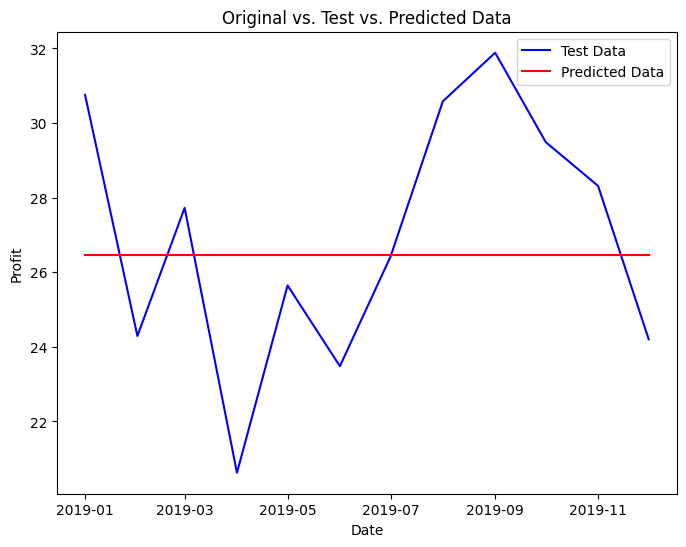

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(test, label='Test Data', color='blue')
plt.plot(predictions, label='Predicted Data', color='red')
plt.legend()
plt.title('Original vs. Test vs. Predicted Data')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()

In [ ]:
import warnings
warnings.simplefilter("ignore")

p =d= q = range(0, 2)
pdq = list(itertools.product(p, d, q))

P =D= Q = range(0, 2)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

best_aic = float("inf")
best_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (param, param_seasonal)
                print(f"ARIMA{param}x{param_seasonal} - AIC: {results.aic}")
        except Exception as e:
            print(f"Error for {param}, {param_seasonal}: {str(e)}")
            continue

print(f"Best AIC: {best_aic}")
print(f"Best Parameters: {best_params}")


ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC: 330.8104325537948
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC: 211.11683215111032
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC: 166.08903196324064
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC: 70.81835116283992
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC: 70.13031299676616
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC: 61.6650714335216
Best AIC: 61.6650714335216
Best Parameters: ((0, 0, 1), (0, 1, 1, 12))


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
best_order = (0, 0, 1)
best_seasonal_order = (0, 1, 1, 12)
model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
model_fit = model.fit()

start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2019-12-01')

predictions = model_fit.predict(start=start_date, end=end_date)

rmse = np.sqrt(mean_squared_error(test, predictions))
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_elements = y_true != 0
    return np.mean(np.abs((y_true[nonzero_elements] - y_pred[nonzero_elements]) / y_true[nonzero_elements]))

def mean_absolute_percentage_accuracy(y_true, y_pred):
    return 100 - mean_absolute_percentage_error(y_true, y_pred)*100

mape = mean_absolute_percentage_error(test, predictions)
mapa = mean_absolute_percentage_accuracy(test, predictions)

print(f'RMSE: {rmse}')
print(f'MAPE: {mape:.4f}')
print(f'MAPA: {mapa:.2f}%')

RMSE: 3.477749812123389
MAPE: 0.1116
MAPA: 88.84%


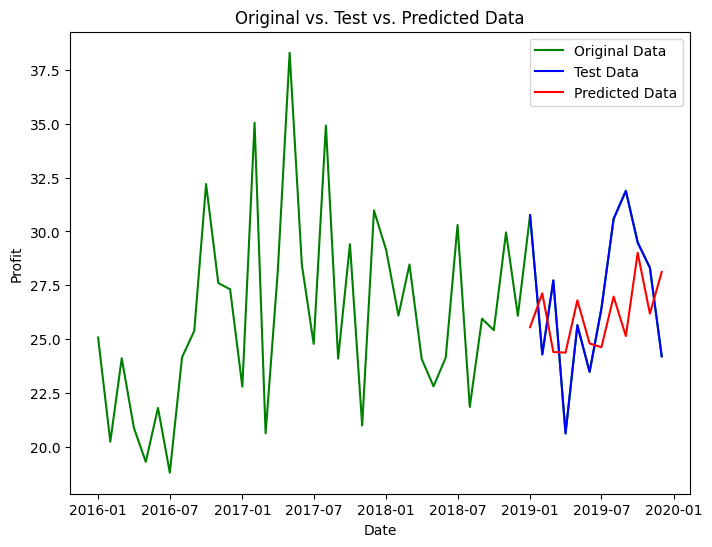

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(timeseries_data, label='Original Data', color='green')
plt.plot(test, label='Test Data', color='blue')
plt.plot(predictions, label='Predicted Data', color='red')
plt.legend()
plt.title('Original vs. Test vs. Predicted Data')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()

END

In [ ]:
timeseries_data = df[['Order Date','Category','Profit']].copy()
timeseries_data.head()

Order Date         Category  Profit
0   1/1/2016  Office Supplies   29.64
1   1/1/2016  Office Supplies  106.14
2   1/1/2016        Furniture   37.77
3   1/1/2016  Office Supplies  15.342
4   1/1/2016  Office Supplies  36.036

In [ ]:
timeseries_data['Category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [ ]:
office_supplies_data = timeseries_data[timeseries_data['Category'] == 'Office Supplies']
furniture_data = timeseries_data[timeseries_data['Category'] == 'Furniture']
technology_data = timeseries_data[timeseries_data['Category'] == 'Technology']

In [ ]:
office_supplies_df=office_supplies_data.drop(columns=['Category'], axis=1)
furniture_df=furniture_data.drop(columns=['Category'], axis=1)
technology_df=technology_data.drop(columns=['Category'], axis=1)

In [ ]:
print(office_supplies_df.head())

print(furniture_df.head())

print(technology_df.head())

  Order Date   Profit
0   1/1/2016    29.64
1   1/1/2016   106.14
3   1/1/2016   15.342
4   1/1/2016   36.036
5   1/1/2016  -26.055
   Order Date    Profit
2    1/1/2016     37.77
7    1/3/2016   -95.676
8    1/3/2016   -26.412
12   1/3/2016    290.43
15   1/3/2016  -70.3995
   Order Date    Profit
6    1/2/2016      3.12
9    1/3/2016      3.42
10   1/3/2016  -319.464
13   1/3/2016     44.88
23   1/3/2016     50.13


In [ ]:
office_supplies_df['Order Date'] = pd.to_datetime(office_supplies_df['Order Date'])
office_supplies_df.set_index('Order Date', inplace=True)
office_supplies_df.head()


Profit
Order Date         
2016-01-01    29.64
2016-01-01   106.14
2016-01-01   15.342
2016-01-01   36.036
2016-01-01  -26.055

In [ ]:
furniture_df['Order Date'] = pd.to_datetime(furniture_df['Order Date'])
furniture_df.set_index('Order Date', inplace=True)
furniture_df.head()

Profit
Order Date          
2016-01-01     37.77
2016-01-03   -95.676
2016-01-03   -26.412
2016-01-03    290.43
2016-01-03  -70.3995

In [ ]:
technology_df['Order Date'] = pd.to_datetime(technology_df['Order Date'])
technology_df.set_index('Order Date', inplace=True)
technology_df.head()

Profit
Order Date          
2016-01-02      3.12
2016-01-03      3.42
2016-01-03  -319.464
2016-01-03     44.88
2016-01-03     50.13

In [ ]:
office_supplies_df['Profit'] = pd.to_numeric(office_supplies_df['Profit'], errors='coerce')
furniture_df['Profit'] = pd.to_numeric(furniture_df['Profit'], errors='coerce')
technology_df['Profit'] = pd.to_numeric(technology_df['Profit'], errors='coerce')

A= Office supplies data

B= Furniture data

C= Technology data

In [ ]:
series_data_A = office_supplies_df['Profit'].resample('MS').mean()
series_data_A.head()

Order Date
2016-01-01    15.992091
2016-02-01    10.619027
2016-03-01    15.387775
2016-04-01    15.996052
2016-05-01    11.893809
Freq: MS, Name: Profit, dtype: float64

In [ ]:
series_data_B = furniture_df['Profit'].resample('MS').mean()
series_data_B.tail()

Order Date
2019-08-01    32.092719
2019-09-01    42.794714
2019-10-01    27.021624
2019-11-01    19.871386
2019-12-01    23.338400
Freq: MS, Name: Profit, dtype: float64

In [ ]:
series_data_C = technology_df['Profit'].resample('MS').mean()
series_data_C.head()

Order Date
2016-01-01    45.624805
2016-02-01    47.907755
2016-03-01    54.345146
2016-04-01    38.346035
2016-05-01    50.040450
Freq: MS, Name: Profit, dtype: float64

In [ ]:
office_monthly_profits = office_supplies_df['Profit'].resample('M').sum()
plt.figure(figsize=(8, 6))
plt.plot(office_monthly_profits, marker='o', linestyle='-')
plt.title('Profits Over Months For Office Supplies Category')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

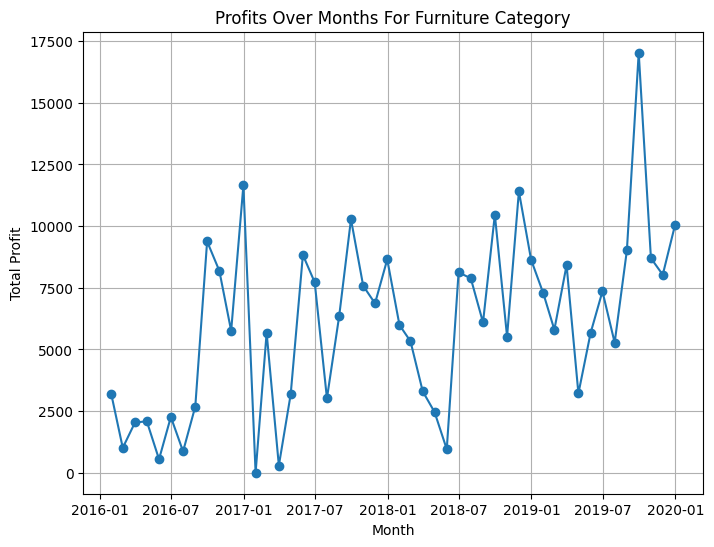

In [ ]:
furn_monthly_profits = furniture_df['Profit'].resample('M').sum()
plt.figure(figsize=(8, 6))
plt.plot(furn_monthly_profits, marker='o', linestyle='-')
plt.title('Profits Over Months For Furniture Category')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

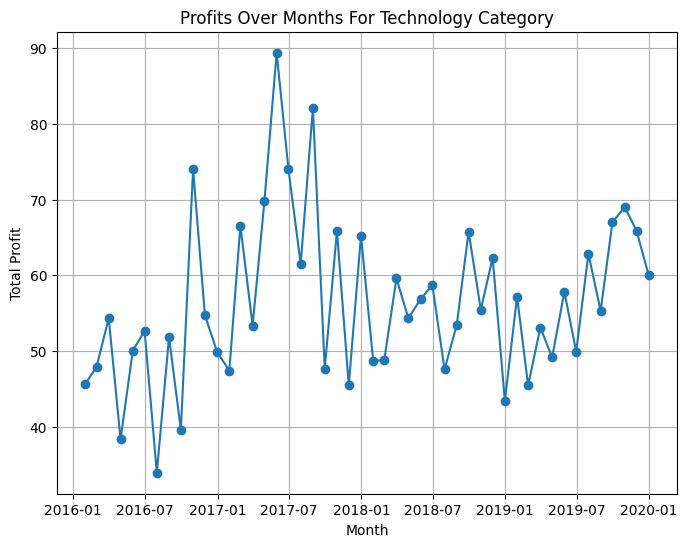

In [ ]:
tech_monthly_profits = technology_df['Profit'].resample('M').mean()
plt.figure(figsize=(8, 6))
plt.plot(tech_monthly_profits, marker='o', linestyle='-')
plt.title('Profits Over Months For Technology Category')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

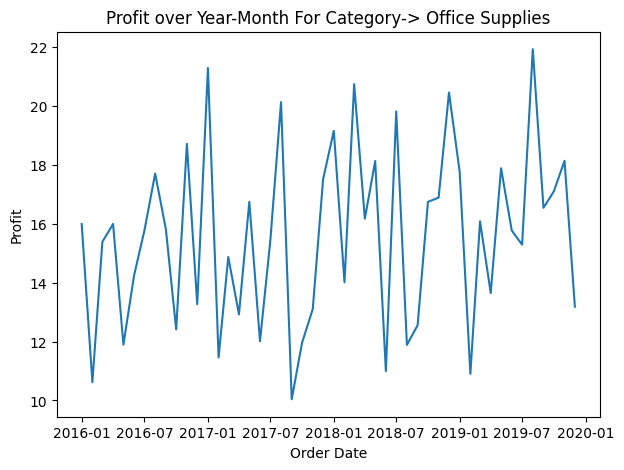

In [ ]:
plt.xlabel("Order Date")
plt.ylabel("Profit")
plt.title('Profit over Year-Month For Category-> Office Supplies')
plt.plot(series_data_A)

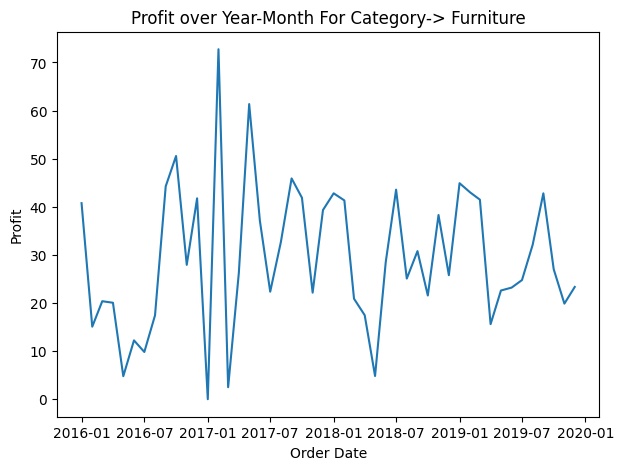

In [ ]:
plt.xlabel("Order Date")
plt.ylabel("Profit")
plt.title('Profit over Year-Month For Category-> Furniture')
plt.plot(series_data_B)

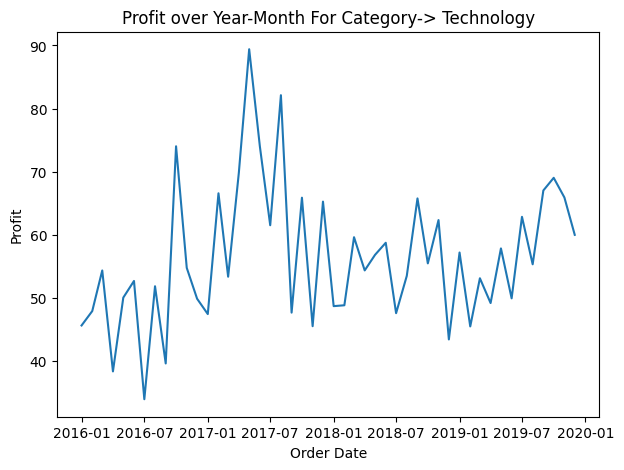

In [ ]:
plt.xlabel("Order Date")
plt.ylabel("Profit")
plt.title('Profit over Year-Month For Category-> Technology')
plt.plot(series_data_C)

Monthly Profit Trends

**Check Stationarity**(Stationary time series data should have a relatively constant mean over time. )


1.Rolling Mean

2.Augmented Dicky -Fuller test



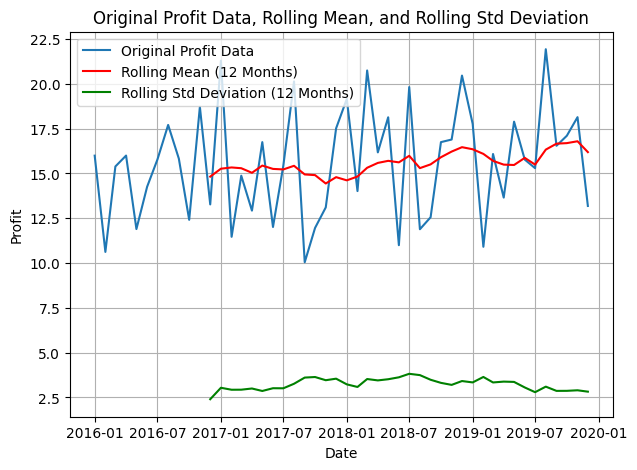

In [ ]:
window_size = 12
rolling_mean = series_data_A.rolling(window=window_size).mean()
rolling_std = series_data_A.rolling(window=window_size).std()

# Plot the original time series data, rolling mean, and rolling standard deviation
plt.figure(figsize=(7, 5))
plt.plot(series_data_A, label='Original Profit Data')
plt.plot(rolling_mean, label=f'Rolling Mean ({window_size} Months)', color='red')
plt.plot(rolling_std, label=f'Rolling Std Deviation ({window_size} Months)', color='green')
plt.title('Original Profit Data, Rolling Mean, and Rolling Std Deviation')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.grid(True)
plt.legend()
plt.show()

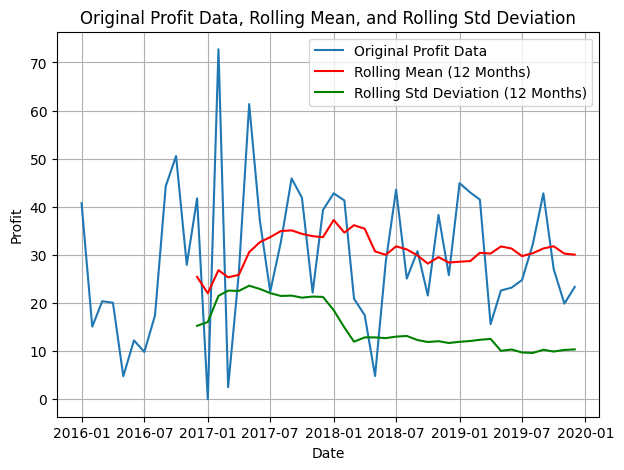

In [ ]:
window_size = 12
rolling_mean = series_data_B.rolling(window=window_size).mean()
rolling_std = series_data_B.rolling(window=window_size).std()

# Plot the original time series data, rolling mean, and rolling standard deviation
plt.figure(figsize=(7, 5))
plt.plot(series_data_B, label='Original Profit Data')
plt.plot(rolling_mean, label=f'Rolling Mean ({window_size} Months)', color='red')
plt.plot(rolling_std, label=f'Rolling Std Deviation ({window_size} Months)', color='green')
plt.title('Original Profit Data, Rolling Mean, and Rolling Std Deviation')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.grid(True)
plt.legend()
plt.show()

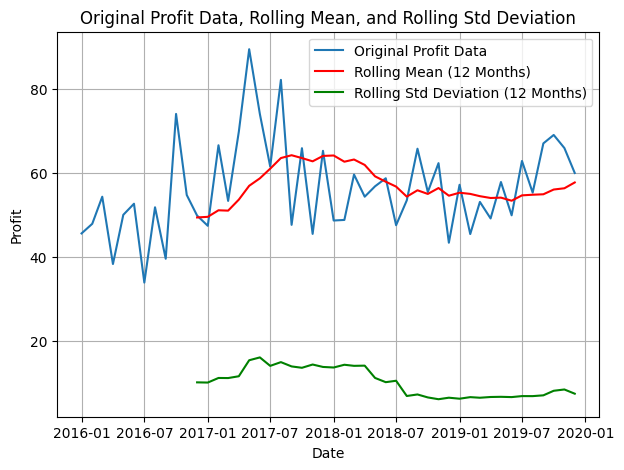

In [ ]:
window_size = 12
rolling_mean = series_data_C.rolling(window=window_size).mean()
rolling_std = series_data_C.rolling(window=window_size).std()

# Plot the original time series data, rolling mean, and rolling standard deviation
plt.figure(figsize=(7, 5))
plt.plot(series_data_C, label='Original Profit Data')
plt.plot(rolling_mean, label=f'Rolling Mean ({window_size} Months)', color='red')
plt.plot(rolling_std, label=f'Rolling Std Deviation ({window_size} Months)', color='green')
plt.title('Original Profit Data, Rolling Mean, and Rolling Std Deviation')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.grid(True)
plt.legend()
plt.show()

ADFuller Test

In [ ]:
result = adfuller(series_data_A, autolag='AIC')

adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Check stationarity based on the p-value
if p_value <= 0.05:
    print('The time series is stationary (reject the null hypothesis).')
else:
    print('The time series is not stationary (fail to reject the null hypothesis).')


ADF Statistic: -8.246219923938026
p-value: 5.544964622589352e-13
Critical Values:
   1%: -3.5778480370438146
   5%: -2.925338105429433
   10%: -2.6007735310095064
The time series is stationary (reject the null hypothesis).


In [ ]:
result = adfuller(series_data_B, autolag='AIC')

adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Check stationarity based on the p-value
if p_value <= 0.05:
    print('The time series is stationary (reject the null hypothesis).')
else:
    print('The time series is not stationary (fail to reject the null hypothesis).')

ADF Statistic: -6.987811288319101
p-value: 7.885510289937985e-10
Critical Values:
   1%: -3.5778480370438146
   5%: -2.925338105429433
   10%: -2.6007735310095064
The time series is stationary (reject the null hypothesis).


In [ ]:
result = adfuller(series_data_C, autolag='AIC')

adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Check stationarity based on the p-value
if p_value <= 0.05:
    print('The time series is stationary (reject the null hypothesis).')
else:
    print('The time series is not stationary (fail to reject the null hypothesis).')

ADF Statistic: -2.8459609942067683
p-value: 0.052002547043111656
Critical Values:
   1%: -3.5812576580093696
   5%: -2.9267849124681518
   10%: -2.6015409829867675
The time series is not stationary (fail to reject the null hypothesis).


Decomposition

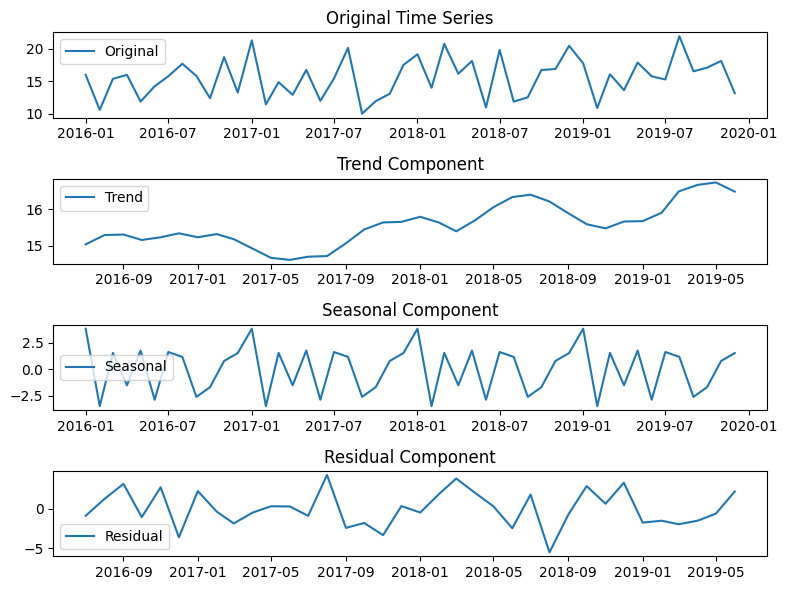

In [ ]:
decomposition = seasonal_decompose(series_data_A, model='additive')

# Plot the original time series
plt.figure(figsize=(8, 6))
plt.subplot(411)
plt.plot(series_data_A, label='Original')
plt.legend(loc='best')
plt.title('Original Time Series')

# Plot the trend component
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend Component')

# Plot the seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.title('Seasonal Component')

# Plot the residual component
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


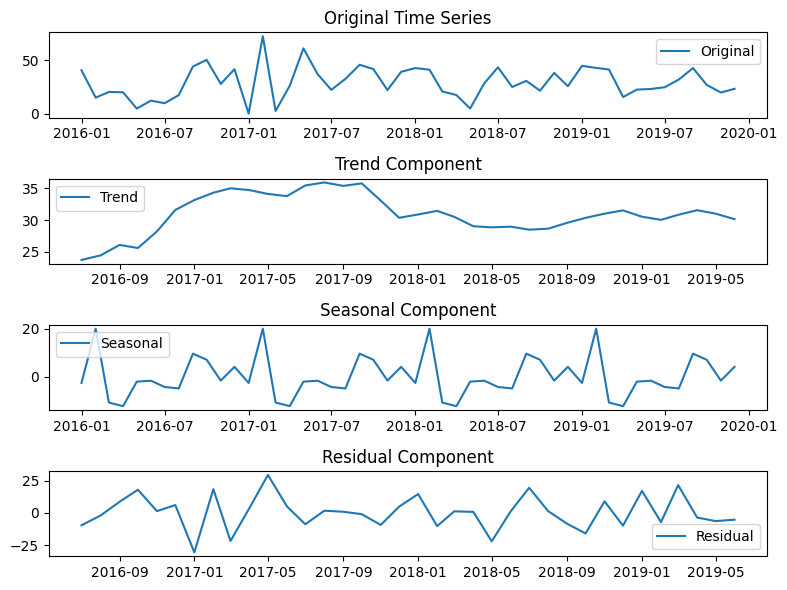

In [ ]:
decomposition = seasonal_decompose(series_data_B, model='additive')

# Plot the original time series
plt.figure(figsize=(8, 6))
plt.subplot(411)
plt.plot(series_data_B, label='Original')
plt.legend(loc='best')
plt.title('Original Time Series')

# Plot the trend component
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend Component')

# Plot the seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.title('Seasonal Component')

# Plot the residual component
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

From the above plots, we can see that there are seasonality present in our data.

Train Test Split

In [ ]:
print(len(series_data_A))
print(len(series_data_B))
print(len(series_data_C))

48
48
48


In [ ]:
train_A=series_data_A[:round(len(series_data_A)*75/100)]
test_A=series_data_A[round(len(series_data_A)*75/100):]
len(train_A),len(test_A)

(36, 12)

In [ ]:
train_B=series_data_B[:round(len(series_data_B)*75/100)]
test_B=series_data_B[round(len(series_data_B)*75/100):]
len(train_B),len(test_B)

(36, 12)

In [ ]:
test_A

Order Date
2019-01-01    17.765212
2019-02-01    10.905479
2019-03-01    16.085173
2019-04-01    13.649710
2019-05-01    17.888757
2019-06-01    15.772523
2019-07-01    15.291072
2019-08-01    21.931192
2019-09-01    16.542971
2019-10-01    17.101986
2019-11-01    18.139717
2019-12-01    13.184573
Freq: MS, Name: Profit, dtype: float64

# **For Category Office supplies (ARIMA+SARIMAX)**

ACF & PACF

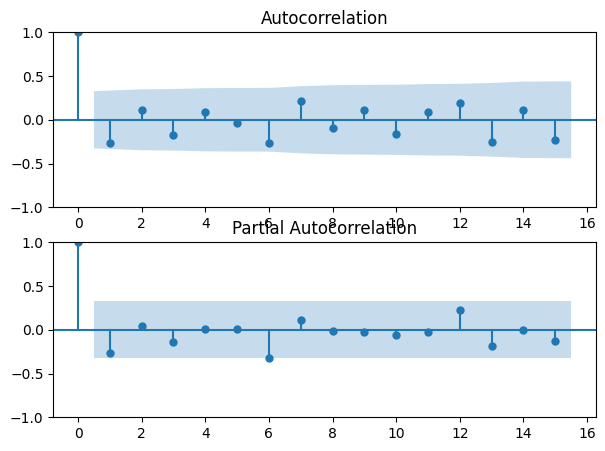

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5))
plot_acf(train_A, lags=15, ax=ax1)
plot_pacf(train_A, lags=15, ax=ax2)

plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(train_A, order=(2, 1, 2))#p=q=2,d=1
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                 Profit   No. Observations:                   36
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -90.546
Date:                Wed, 15 Nov 2023   AIC                            191.092
Time:                        16:20:47   BIC                            198.868
Sample:                    01-01-2016   HQIC                           193.776
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6041      1.831     -0.330      0.741      -4.192       2.984
ar.L2          0.0013      0.613      0.002      0.998      -1.200       1.202
ma.L1         -0.5807      1.843     -0.315      0.7

In [ ]:
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2019-12-01')

predictions = model_fit.predict(start=start_date, end=end_date)


In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test_A, predictions)
rmse = np.sqrt(mean_squared_error(test_A, predictions))
print(f'RMSE: {rmse}',f'MSE: {mse}')

RMSE: 2.9887279055969573 MSE: 8.932494493693975


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_elements = y_true != 0
    return np.mean(np.abs((y_true[nonzero_elements] - y_pred[nonzero_elements]) / y_true[nonzero_elements]))

def mean_absolute_percentage_accuracy(y_true, y_pred):
    return 100 - mean_absolute_percentage_error(y_true, y_pred)*100

mape = mean_absolute_percentage_error(test_A, predictions)
mapa = mean_absolute_percentage_accuracy(test_A, predictions)

print(f'MAPE: {mape:.4f}')
print(f'MAPA: {mapa:.2f}%')


MAPE: 0.1512
MAPA: 84.88%


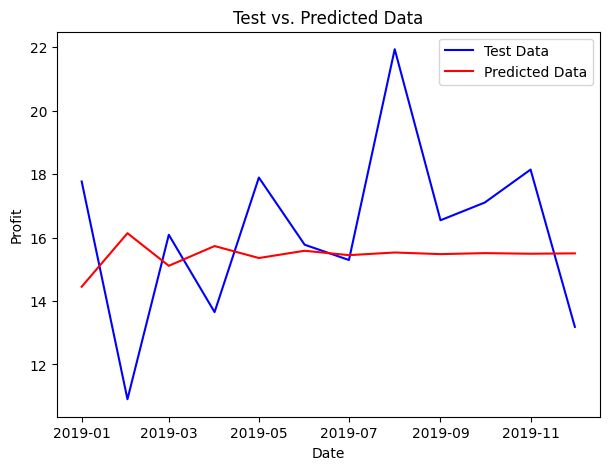

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(test_A, label='Test Data', color='blue')
plt.plot(predictions, label='Predicted Data', color='red')
plt.legend()
plt.title('Test vs. Predicted Data')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()

**Find Arima parameters(p,d,q)using iterative method**

In [ ]:
import warnings
warnings.simplefilter("ignore")
import itertools
import statsmodels.api as sm

p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 4)

pdq_combinations = list(itertools.product(p_values, d_values, q_values))
aic_results = []

for pdq in pdq_combinations:
    try:
        model = sm.tsa.ARIMA(train_A, order=pdq)
        results = model.fit()
        aic_results.append((pdq, results.aic))
        print(f"PDQ: {pdq}, AIC: {results.aic}")
    except:
        continue

best_pdq = min(aic_results, key=lambda x: x[1])[0]

print(f"Best PDQ combination: {best_pdq}")


PDQ: (0, 0, 0), AIC: 188.20858222755
PDQ: (0, 0, 1), AIC: 187.6839111275405
PDQ: (0, 0, 2), AIC: 189.66600177710149
PDQ: (0, 0, 3), AIC: 189.8445563629113
PDQ: (0, 1, 0), AIC: 213.39941549406325
PDQ: (0, 1, 1), AIC: 187.66115658962076
PDQ: (0, 1, 2), AIC: 187.70233173787437
PDQ: (0, 1, 3), AIC: 189.59160979102808
PDQ: (1, 0, 0), AIC: 187.52401238487215
PDQ: (1, 0, 1), AIC: 189.28112539240686
PDQ: (1, 0, 2), AIC: 191.24915197279552
PDQ: (1, 0, 3), AIC: 190.9113435872437
PDQ: (1, 1, 0), AIC: 196.02741663383574
PDQ: (1, 1, 1), AIC: 187.44542511372472
PDQ: (1, 1, 2), AIC: 190.83784243396408
PDQ: (1, 1, 3), AIC: 191.09148543960583
PDQ: (2, 0, 0), AIC: 189.4661752696456
PDQ: (2, 0, 1), AIC: 191.26723756044512
PDQ: (2, 0, 2), AIC: 191.46901823874086
PDQ: (2, 0, 3), AIC: 187.93909874465746
PDQ: (2, 1, 0), AIC: 195.55107629507248
PDQ: (2, 1, 1), AIC: 189.29974739135457
PDQ: (2, 1, 2), AIC: 191.09151551261894
PDQ: (2, 1, 3), AIC: 186.06278935849656
PDQ: (3, 0, 0), AIC: 190.56319934067605
PDQ: (3

In [ ]:
from sklearn.metrics import mean_squared_error
model = ARIMA(train_A, order=(2, 1, 3))
model_fit = model.fit()
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2019-12-01')

predictions = model_fit.predict(start=start_date, end=end_date)

mse=mean_squared_error(test_A, predictions)
rmse = np.sqrt(mean_squared_error(test_A, predictions))
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_elements = y_true != 0
    return np.mean(np.abs((y_true[nonzero_elements] - y_pred[nonzero_elements]) / y_true[nonzero_elements]))

def mean_absolute_percentage_accuracy(y_true, y_pred):
    return 100 - mean_absolute_percentage_error(y_true, y_pred)*100

mape = mean_absolute_percentage_error(test_A, predictions)
mapa = mean_absolute_percentage_accuracy(test_A, predictions)

print(f'RMSE: {rmse}',f'MSE: {mse}')
print(f'MAPE: {mape:.4f}')
print(f'MAPA: {mapa:.2f}%')

RMSE: 3.7890869496201214 MSE: 14.357179911781515
MAPE: 0.1955
MAPA: 80.45%


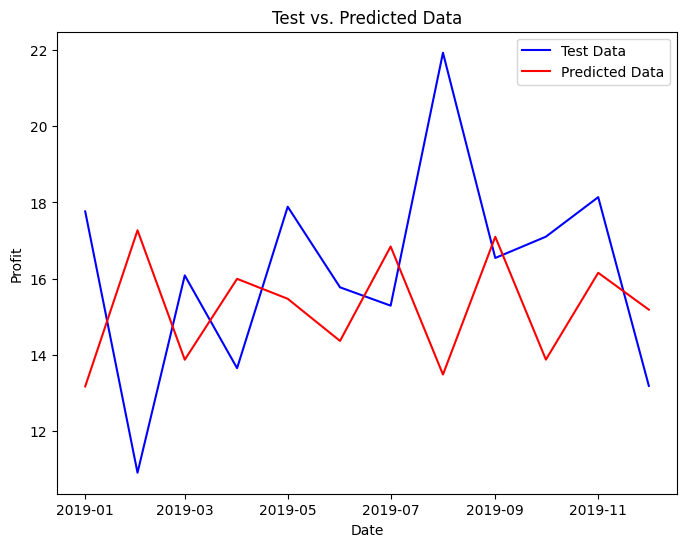

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(test_A, label='Test Data', color='blue')
plt.plot(predictions, label='Predicted Data', color='red')
plt.legend()
plt.title('Test vs. Predicted Data')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()

 **Find Sarima parameters(p,d,q)using iterative method**

In [ ]:
import warnings
warnings.simplefilter("ignore")

p =d= q = range(0, 2)
pdq = list(itertools.product(p, d, q))

P =D= Q = range(0, 2)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

best_aic = float("inf")
best_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_A,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (param, param_seasonal)
                print(f"ARIMA{param}x{param_seasonal} - AIC: {results.aic}")
        except Exception as e:
            print(f"Error for {param}, {param_seasonal}: {str(e)}")
            continue

print(f"Best AIC: {best_aic}")
print(f"Best Parameters: {best_params}")


ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC: 293.92360197181046
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC: 185.01392776179142
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC: 128.31185665337017
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC: 65.68005492428455
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC: 62.54046692910661
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC: 55.83629012413404
Best AIC: 55.83629012413404
Best Parameters: ((0, 1, 1), (0, 1, 1, 12))


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
best_order = (0, 1, 1)
best_seasonal_order = (0, 1, 1, 12)
model = SARIMAX(train_A, order=best_order, seasonal_order=best_seasonal_order)
model_fit = model.fit()

start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2019-12-01')

predictions = model_fit.predict(start=start_date, end=end_date)

rmse = np.sqrt(mean_squared_error(test_A, predictions))
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_elements = y_true != 0
    return np.mean(np.abs((y_true[nonzero_elements] - y_pred[nonzero_elements]) / y_true[nonzero_elements]))

def mean_absolute_percentage_accuracy(y_true, y_pred):
    return 100 - mean_absolute_percentage_error(y_true, y_pred)*100

mape = mean_absolute_percentage_error(test_A, predictions)
mapa = mean_absolute_percentage_accuracy(test_A, predictions)

print(f'RMSE: {rmse}')
print(f'MAPE: {mape:.4f}')
print(f'MAPA: {mapa:.2f}%')

RMSE: 3.5186065746058905
MAPE: 0.1969
MAPA: 80.31%


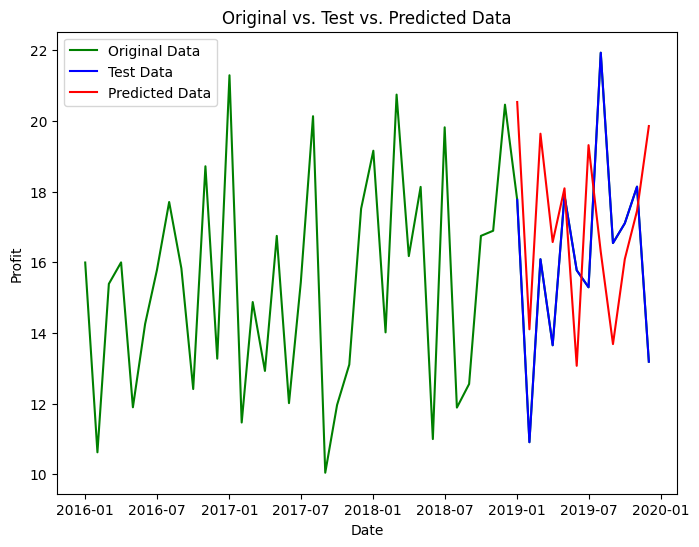

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(series_data_A, label='Original Data', color='green')
plt.plot(test_A, label='Test Data', color='blue')
plt.plot(predictions, label='Predicted Data', color='red')
plt.legend()
plt.title('Original vs. Test vs. Predicted Data')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

lags = 3
for i in range(1, lags + 1):
    office_supplies_df[f'profit_lag_{i}'] = office_supplies_df['Profit'].shift(i)


data = office_supplies_df.dropna()


train_size = int(len(data) * 0.75)
train, test = data[0:train_size], data[train_size:]

features = [f'profit_lag_{i}' for i in range(1, lags + 1)]
X_train, y_train = train[features], train['Profit']
X_test, y_test = test[features], test['Profit']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_elements = y_true != 0
    return np.mean(np.abs((y_true[nonzero_elements] - y_pred[nonzero_elements]) / y_true[nonzero_elements]))

def mean_absolute_percentage_accuracy(y_true, y_pred):
    return 100 - mean_absolute_percentage_error(y_true, y_pred)*100

mape = mean_absolute_percentage_error(y_test, y_pred)
mapa = mean_absolute_percentage_accuracy(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAPE: {mape:.4f}')
print(f'MAPA: {mapa:.2f}%')

RMSE: 72.01532479093711
MAPE: 5.8989
MAPA: -489.89%


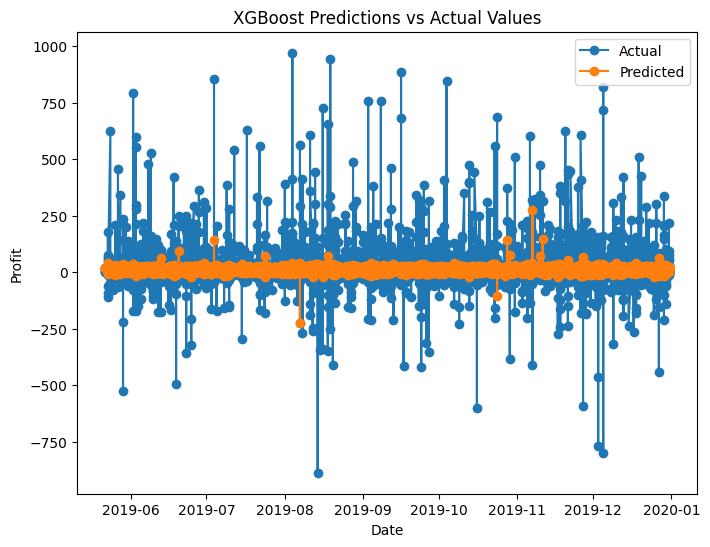

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(test.index, y_test, label='Actual', marker='o')
plt.plot(test.index, y_pred, label='Predicted', marker='o')
plt.title('XGBoost Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.show()

For Category Furniture (ARIMA+SARIMAX)

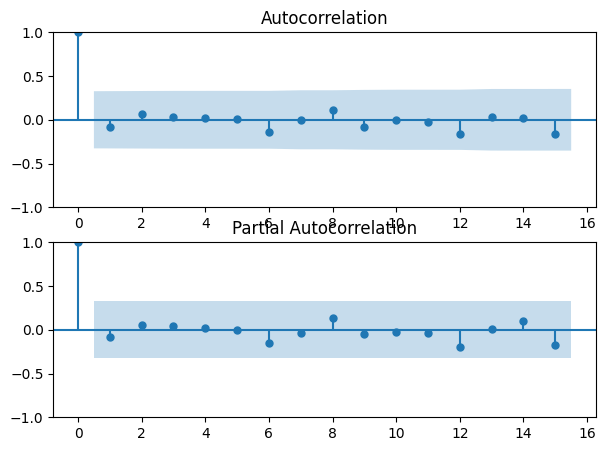

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5))
plot_acf(train_B, lags=15, ax=ax1)
plot_pacf(train_B, lags=15, ax=ax2)

plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(train_B, order=(2, 1, 2)) #p=q=2,d=1
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Profit   No. Observations:                   36
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -149.328
Date:                Wed, 15 Nov 2023   AIC                            308.656
Time:                        16:21:16   BIC                            316.433
Sample:                    01-01-2016   HQIC                           311.341
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0971      0.812     -1.350      0.177      -2.690       0.495
ar.L2         -0.1155      0.156     -0.740      0.460      -0.422       0.191
ma.L1          0.0978     29.743      0.003      0.9

In [ ]:
from sklearn.metrics import mean_squared_error
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2019-12-01')

predictions = model_fit.predict(start=start_date, end=end_date)

mse=mean_squared_error(test_B, predictions)
rmse = np.sqrt(mean_squared_error(test_B, predictions))
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_elements = y_true != 0
    return np.mean(np.abs((y_true[nonzero_elements] - y_pred[nonzero_elements]) / y_true[nonzero_elements]))

def mean_absolute_percentage_accuracy(y_true, y_pred):
    return 100 - mean_absolute_percentage_error(y_true, y_pred)*100

mape = mean_absolute_percentage_error(test_B, predictions)
mapa = mean_absolute_percentage_accuracy(test_B, predictions)

print(f'RMSE: {rmse}',f'MSE: {mse}')
print(f'MAPE: {mape:.4f}')
print(f'MAPA: {mapa:.2f}%')

RMSE: 9.726568334975076 MSE: 94.60613157493982
MAPE: 0.3166
MAPA: 68.34%


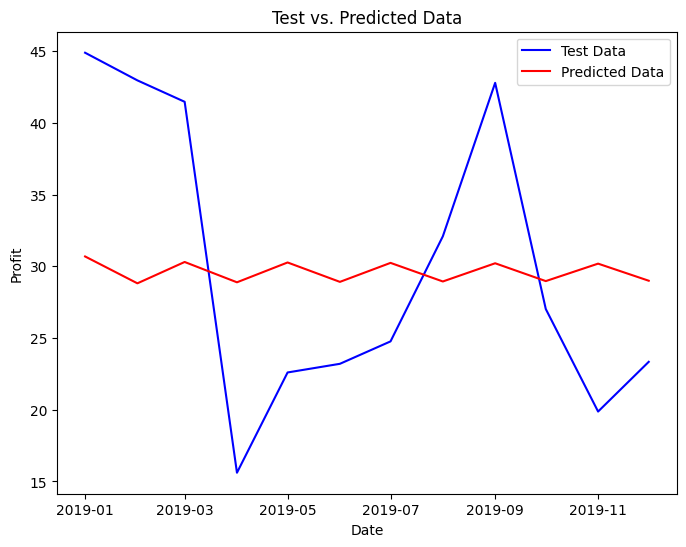

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(test_B, label='Test Data', color='blue')
plt.plot(predictions, label='Predicted Data', color='red')
plt.legend()
plt.title('Test vs. Predicted Data')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()

Grid Search for Arima

In [ ]:
import warnings
warnings.simplefilter("ignore")
import itertools
import statsmodels.api as sm

p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

pdq_combinations = list(itertools.product(p_values, d_values, q_values))
aic_results = []

for pdq in pdq_combinations:
    try:
        model = sm.tsa.ARIMA(train_B, order=pdq)
        results = model.fit()
        aic_results.append((pdq, results.aic))
        print(f"PDQ: {pdq}, AIC: {results.aic}")
    except:
        continue

best_pdq = min(aic_results, key=lambda x: x[1])[0]

print(f"Best PDQ combination: {best_pdq}")


PDQ: (0, 0, 0), AIC: 306.7273460183354
PDQ: (0, 0, 1), AIC: 308.51288008554684
PDQ: (0, 0, 2), AIC: 310.33934014495344
PDQ: (0, 1, 0), AIC: 324.0850477628901
PDQ: (0, 1, 1), AIC: 302.887336483892
PDQ: (0, 1, 2), AIC: 304.77333978714876
PDQ: (1, 0, 0), AIC: 308.48522326396295
PDQ: (1, 0, 1), AIC: 310.42402210628035
PDQ: (1, 0, 2), AIC: 312.27589415934915
PDQ: (1, 1, 0), AIC: 312.9270894420333
PDQ: (1, 1, 1), AIC: 304.7408120610647
PDQ: (1, 1, 2), AIC: 306.6782216166023
PDQ: (2, 0, 0), AIC: 310.35949023710475
PDQ: (2, 0, 1), AIC: 312.30735782879043
PDQ: (2, 0, 2), AIC: 311.90250253724014
PDQ: (2, 1, 0), AIC: 310.5122191130939
PDQ: (2, 1, 1), AIC: 306.51315763377966
PDQ: (2, 1, 2), AIC: 308.6562930262363
Best PDQ combination: (0, 1, 1)


In [ ]:
from sklearn.metrics import mean_squared_error
model = ARIMA(train_B, order=(0, 1, 1))
model_fit = model.fit()
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2019-12-01')

predictions = model_fit.predict(start=start_date, end=end_date)

mse=mean_squared_error(test_B, predictions)
rmse = np.sqrt(mean_squared_error(test_B, predictions))
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_elements = y_true != 0
    return np.mean(np.abs((y_true[nonzero_elements] - y_pred[nonzero_elements]) / y_true[nonzero_elements]))

def mean_absolute_percentage_accuracy(y_true, y_pred):
    return 100 - mean_absolute_percentage_error(y_true, y_pred)*100

mape = mean_absolute_percentage_error(test_B, predictions)
mapa = mean_absolute_percentage_accuracy(test_B, predictions)

print(f'RMSE: {rmse}',f'MSE: {mse}')
print(f'MAPE: {mape:.4f}')
print(f'MAPA: {mapa:.2f}%')

RMSE: 9.9597346213134 MSE: 99.19631372698876
MAPE: 0.3143
MAPA: 68.57%


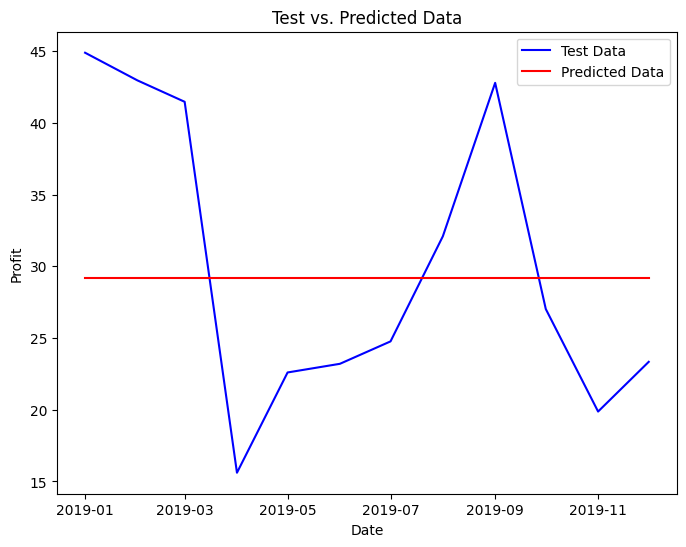

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(test_B, label='Test Data', color='blue')
plt.plot(predictions, label='Predicted Data', color='red')
plt.legend()
plt.title('Test vs. Predicted Data')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()

In [ ]:
#grid search for Sarima model

In [ ]:
import warnings
warnings.simplefilter("ignore")

p =d= q = range(0, 2)
pdq = list(itertools.product(p, d, q))

P =D= Q = range(0, 2)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

best_aic = float("inf")
best_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_B,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (param, param_seasonal)
                print(f"ARIMA{param}x{param_seasonal} - AIC: {results.aic}")
        except Exception as e:
            print(f"Error for {param}, {param_seasonal}: {str(e)}")
            continue

print(f"Best AIC: {best_aic}")
print(f"Best Parameters: {best_params}")


ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC: 346.36854533919995
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC: 226.55688491375446
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC: 217.9430029244582
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC: 96.53401049614322
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC: 90.79078270755167
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC: 86.51351931659501
Best AIC: 86.51351931659501
Best Parameters: ((0, 1, 1), (0, 1, 1, 12))


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
best_order = (0, 1, 1)
best_seasonal_order = (0, 1, 1, 12)
model = SARIMAX(train_B, order=best_order, seasonal_order=best_seasonal_order)
model_fit = model.fit()

start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2019-12-01')

predictions = model_fit.predict(start=start_date, end=end_date)

rmse = np.sqrt(mean_squared_error(test_B, predictions))
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_elements = y_true != 0
    return np.mean(np.abs((y_true[nonzero_elements] - y_pred[nonzero_elements]) / y_true[nonzero_elements]))

def mean_absolute_percentage_accuracy(y_true, y_pred):
    return 100 - mean_absolute_percentage_error(y_true, y_pred)*100

mape = mean_absolute_percentage_error(test_B, predictions)
mapa = mean_absolute_percentage_accuracy(test_B, predictions)

print(f'RMSE: {rmse}')
print(f'MAPE: {mape:.4f}')
print(f'MAPA: {mapa:.2f}%')

RMSE: 11.046509939120243
MAPE: 0.2839
MAPA: 71.61%


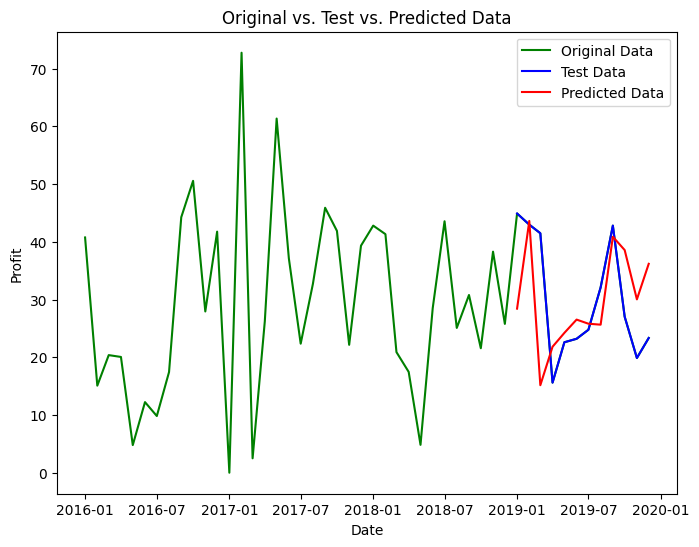

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(series_data_B, label='Original Data', color='green')
plt.plot(test_B, label='Test Data', color='blue')
plt.plot(predictions, label='Predicted Data', color='red')
plt.legend()
plt.title('Original vs. Test vs. Predicted Data')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

lags = 3
for i in range(1, lags + 1):
    furniture_df[f'profit_lag_{i}'] = furniture_df['Profit'].shift(i)


data = furniture_df.dropna()


train_size = int(len(data) * 0.75)
train, test = data[0:train_size], data[train_size:]

features = [f'profit_lag_{i}' for i in range(1, lags + 1)]
X_train, y_train = train[features], train['Profit']
X_test, y_test = test[features], test['Profit']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_elements = y_true != 0
    return np.mean(np.abs((y_true[nonzero_elements] - y_pred[nonzero_elements]) / y_true[nonzero_elements]))

def mean_absolute_percentage_accuracy(y_true, y_pred):
    return 100 - mean_absolute_percentage_error(y_true, y_pred)*100

mape = mean_absolute_percentage_error(y_test, y_pred)
mapa = mean_absolute_percentage_accuracy(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAPE: {mape:.4f}')
print(f'MAPA: {mapa:.2f}%')

RMSE: 162.80649324528227
MAPE: 20.7826
MAPA: -1978.26%


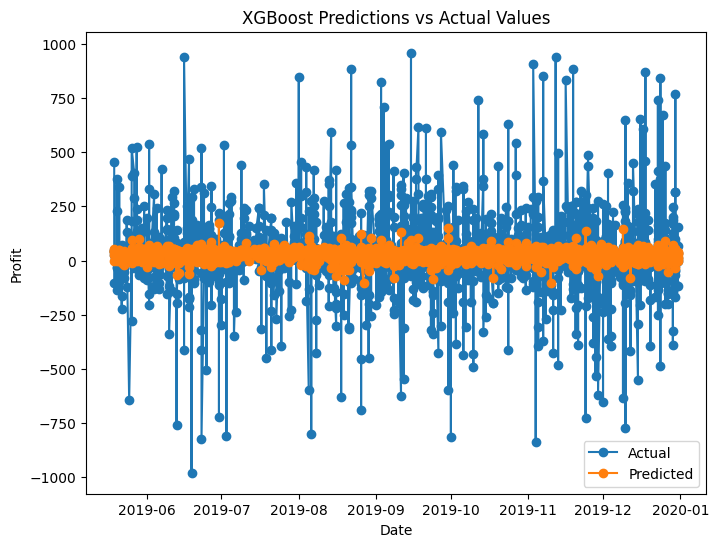

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(test.index, y_test, label='Actual', marker='o')
plt.plot(test.index, y_pred, label='Predicted', marker='o')
plt.title('XGBoost Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.show()

For Category Technology (ARIMA+SARIMAX)

In [ ]:
#Using Differencing method to convert non stationary data into stationarity
stationary_series_data_C = series_data_C - series_data_C.shift(1)
stationary_series_data_C.dropna(inplace=True)
stationary_series_data_C.head()

Order Date
2016-02-01     2.282949
2016-03-01     6.437392
2016-04-01   -15.999111
2016-05-01    11.694415
2016-06-01     2.638519
Freq: MS, Name: Profit, dtype: float64

In [ ]:
result = adfuller(stationary_series_data_C, autolag='AIC')

adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Check stationarity based on the p-value
if p_value <= 0.05:
    print('The time series is stationary (reject the null hypothesis).')
else:
    print('The time series is not stationary (fail to reject the null hypothesis).')

ADF Statistic: -14.519317599221518
p-value: 5.55777159002467e-27
Critical Values:
   1%: -3.5812576580093696
   5%: -2.9267849124681518
   10%: -2.6015409829867675
The time series is stationary (reject the null hypothesis).


In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(stationary_series_data_C,autolag='AIC')
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

ADF Statistic: -14.519317599221518
p-value: 5.55777159002467e-27
Critical Values: {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}


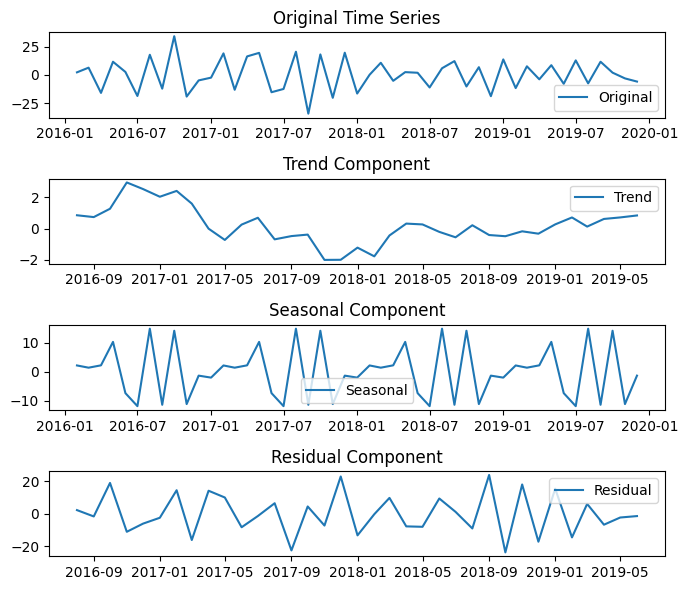

In [ ]:
decomposition = seasonal_decompose(stationary_series_data_C, model='additive')

# Plot the original time series
plt.figure(figsize=(7, 6))
plt.subplot(411)
plt.plot(stationary_series_data_C, label='Original')
plt.legend(loc='best')
plt.title('Original Time Series')

# Plot the trend component
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend Component')

# Plot the seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.title('Seasonal Component')

# Plot the residual component
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

In [ ]:
train_C=stationary_series_data_C[:round(len(stationary_series_data_C)*75/100)]
test_C=stationary_series_data_C[round(len(stationary_series_data_C)*75/100):]
len(train_C),len(test_C)

(35, 12)

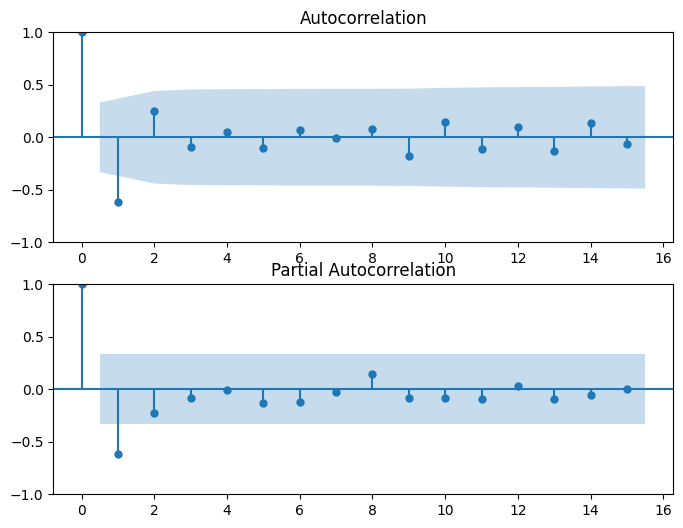

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
plot_acf(train_C, lags=15, ax=ax1)
plot_pacf(train_C, lags=15, ax=ax2)

plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(train_C, order=(2, 1, 2)) #Assume: p=q=2,d=1
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Profit   No. Observations:                   35
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -134.730
Date:                Wed, 15 Nov 2023   AIC                            279.459
Time:                        16:21:41   BIC                            287.091
Sample:                    02-01-2016   HQIC                           282.062
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3226      0.817     -0.395      0.693      -1.923       1.278
ar.L2          0.0561      0.549      0.102      0.919      -1.020       1.133
ma.L1         -1.4822     22.106     -0.067      0.9

In [ ]:
from sklearn.metrics import mean_squared_error
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2019-12-01')

predictions = model_fit.predict(start=start_date, end=end_date)

mse=mean_squared_error(test_C, predictions)
rmse = np.sqrt(mean_squared_error(test_C, predictions))
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_elements = y_true != 0
    return np.mean(np.abs((y_true[nonzero_elements] - y_pred[nonzero_elements]) / y_true[nonzero_elements]))

def mean_absolute_percentage_accuracy(y_true, y_pred):
    return 100 - mean_absolute_percentage_error(y_true, y_pred)*100

mape = mean_absolute_percentage_error(test_C, predictions)
mapa = mean_absolute_percentage_accuracy(test_C, predictions)

print(f'RMSE: {rmse}',f'MSE: {mse}')
print(f'MAPE: {mape:.4f}')
print(f'MAPA: {mapa:.2f}%')


RMSE: 7.074094122618665 MSE: 50.042807655667936
MAPE: 0.8213
MAPA: 17.87%


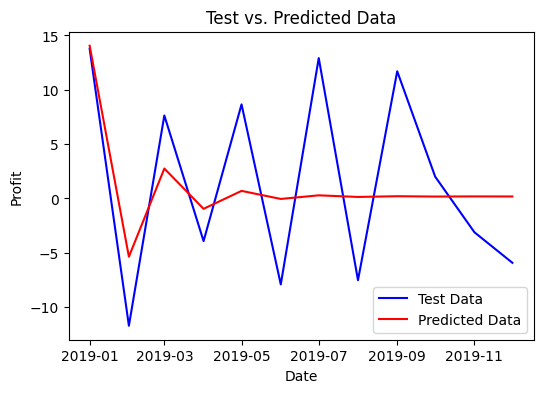

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(test_C, label='Test Data', color='blue')
plt.plot(predictions, label='Predicted Data', color='red')
plt.legend()
plt.title('Test vs. Predicted Data')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()

Grid search For Arima

In [ ]:
import warnings
warnings.simplefilter("ignore")
import itertools
import statsmodels.api as sm

p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

pdq_combinations = list(itertools.product(p_values, d_values, q_values))
aic_results = []

for pdq in pdq_combinations:
    try:
        model = sm.tsa.ARIMA(train_C, order=pdq)
        results = model.fit()
        aic_results.append((pdq, results.aic))
        print(f"PDQ: {pdq}, AIC: {results.aic}")
    except:
        continue

best_pdq = min(aic_results, key=lambda x: x[1])[0]

print(f"Best PDQ combination: {best_pdq}")


PDQ: (0, 0, 0), AIC: 295.3085079349826
PDQ: (0, 0, 1), AIC: 278.76803378767795
PDQ: (0, 0, 2), AIC: 279.49752509143656
PDQ: (0, 1, 0), AIC: 325.4881629741073
PDQ: (0, 1, 1), AIC: 291.5272074380222
PDQ: (0, 1, 2), AIC: 277.82999719251717
PDQ: (1, 0, 0), AIC: 279.84128589809933
PDQ: (1, 0, 1), AIC: 278.8856717158373
PDQ: (1, 0, 2), AIC: 280.781377440251
PDQ: (1, 1, 0), AIC: 297.88275015935216
PDQ: (1, 1, 1), AIC: 277.5194464358135
PDQ: (1, 1, 2), AIC: 277.4705672041066
PDQ: (2, 0, 0), AIC: 279.6308115614143
PDQ: (2, 0, 1), AIC: 279.85032404172364
PDQ: (2, 0, 2), AIC: 281.29728630466764
PDQ: (2, 1, 0), AIC: 289.4194780873669
PDQ: (2, 1, 1), AIC: 277.7944220764034
PDQ: (2, 1, 2), AIC: 279.4594981398242
Best PDQ combination: (1, 1, 2)


In [ ]:
from sklearn.metrics import mean_squared_error
model = ARIMA(train_C, order=(1, 1, 2))
model_fit = model.fit()
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2019-12-01')

predictions = model_fit.predict(start=start_date, end=end_date)

mse=mean_squared_error(test_C, predictions)
rmse = np.sqrt(mean_squared_error(test_C, predictions))
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_elements = y_true != 0
    return np.mean(np.abs((y_true[nonzero_elements] - y_pred[nonzero_elements]) / y_true[nonzero_elements]))

def mean_absolute_percentage_accuracy(y_true, y_pred):
    return 100 - mean_absolute_percentage_error(y_true, y_pred)*100

mape = mean_absolute_percentage_error(test_C, predictions)
mapa = mean_absolute_percentage_accuracy(test_C, predictions)

print(f'RMSE: {rmse}',f'MSE: {mse}')
print(f'MAPE: {mape:.4f}')
print(f'MAPA: {mapa:.2f}%')

RMSE: 7.139863142063249 MSE: 50.9776456873933
MAPE: 0.8336
MAPA: 16.64%


In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(test_C, label='Test Data', color='blue')
plt.plot(predictions, label='Predicted Data', color='red')
plt.legend()
plt.title('Test vs. Predicted Data')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()

Grid search for Sarima model

In [ ]:
import warnings
warnings.simplefilter("ignore")

p =d= q = range(0, 2)
pdq = list(itertools.product(p, d, q))

P =D= Q = range(0, 2)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

best_aic = float("inf")
best_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_C,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (param, param_seasonal)
                print(f"ARIMA{param}x{param_seasonal} - AIC: {results.aic}")
        except Exception as e:
            print(f"Error for {param}, {param_seasonal}: {str(e)}")
            continue

print(f"Best AIC: {best_aic}")
print(f"Best Parameters: {best_params}")


ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC: 285.9505429254098
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC: 184.66933571474354
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC: 93.87320606884406
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC: 80.38932619519528
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC: 78.9179138674757
ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC: 75.77368284547431
ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC: 72.65452537823059
ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC: 71.5054070295746
Best AIC: 71.5054070295746
Best Parameters: ((1, 1, 1), (0, 1, 1, 12))


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
best_order = (1, 1, 1)
best_seasonal_order = (0, 1, 1, 12)
model = SARIMAX(train_C, order=best_order, seasonal_order=best_seasonal_order)
model_fit = model.fit()

start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2019-12-01')

predictions = model_fit.predict(start=start_date, end=end_date)

rmse = np.sqrt(mean_squared_error(test_C, predictions))
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_elements = y_true != 0
    return np.mean(np.abs((y_true[nonzero_elements] - y_pred[nonzero_elements]) / y_true[nonzero_elements]))

def mean_absolute_percentage_accuracy(y_true, y_pred):
    return 100 - mean_absolute_percentage_error(y_true, y_pred)*100

mape = mean_absolute_percentage_error(test_C, predictions)
mapa = mean_absolute_percentage_accuracy(test_C, predictions)

print(f'RMSE: {rmse}')
print(f'MAPE: {mape:.4f}')
print(f'MAPA: {mapa:.2f}%')

RMSE: 13.442679162064678
MAPE: 1.5421
MAPA: -54.21%


In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(stationary_series_data_C, label='Original Data', color='green')  # Plot the original dataset
plt.plot(test_C, label='Test Data', color='blue')
plt.plot(predictions, label='Predicted Data', color='red')
plt.legend()
plt.title('Original vs. Test vs. Predicted Data')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

lags = 3
for i in range(1, lags + 1):
    technology_df[f'profit_lag_{i}'] = technology_df['Profit'].shift(i)


data = technology_df.dropna()


train_size = int(len(data) * 0.75)
train, test = data[0:train_size], data[train_size:]

features = [f'profit_lag_{i}' for i in range(1, lags + 1)]
X_train, y_train = train[features], train['Profit']
X_test, y_test = test[features], test['Profit']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_elements = y_true != 0
    return np.mean(np.abs((y_true[nonzero_elements] - y_pred[nonzero_elements]) / y_true[nonzero_elements]))

def mean_absolute_percentage_accuracy(y_true, y_pred):
    return 100 - mean_absolute_percentage_error(y_true, y_pred)*100

mape = mean_absolute_percentage_error(y_test, y_pred)
mapa = mean_absolute_percentage_accuracy(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAPE: {mape:.4f}')
print(f'MAPA: {mapa:.2f}%')

RMSE: 178.70867250049497
MAPE: 7.5112
MAPA: -651.12%


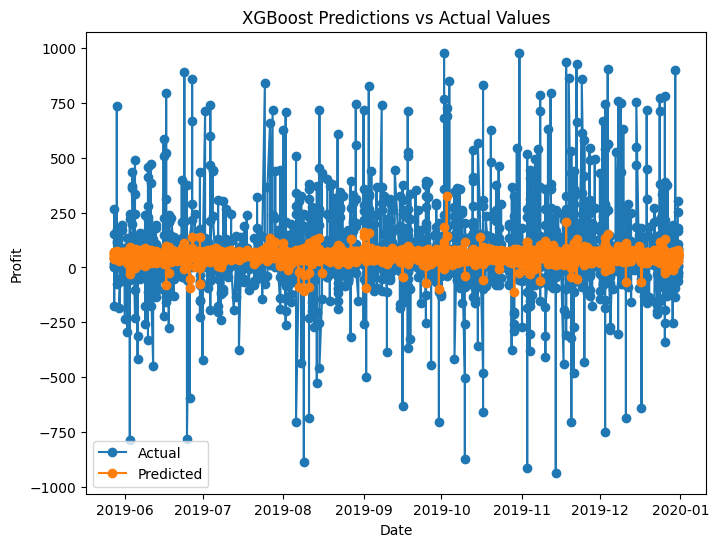

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(test.index, y_test, label='Actual', marker='o')
plt.plot(test.index, y_pred, label='Predicted', marker='o')
plt.title('XGBoost Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.show()